<span><small>Hult International Business School</small></span>
<span style="margin-left: 17%"><small>Machine Learning, Business Analytics</small></span>
<span style="float: right"><small>MsBA2&nbsp; Spring 2021</small></span>
<hr style="color: black; display: block; height: 1px; border: ; margin-bottom: 1.5em; margin-top: .3em">
<h3 style="margin-top: 2em">Team 12 Project - Unsupervised Analysis </h3>
<center>
    <h2 style="margin-top: 1.5em; color: #000">Business Report</h2>
    <br>
    <div style="margin-right: 3.5em"><table border="0">
        <tr><td>Course:&nbsp;</td>     <td><span style="padding-right: 1.5em">DAT-5303 Machine Learning</span></td></tr>
     <tr><td>Instructor:&nbsp;</td> <td><span style="padding-right: 2.7em">Prof. Chase B. Kusterer</span></td></tr>
     <tr><td>Author:&nbsp;</td>     <td><span style="padding-right: 5.2em">Team 12 MsBA2</span></td></tr>
     <tr><td>Institution:&nbsp;</td><td>Hult International Business School</td></tr>
     <tr><td>Date:&nbsp;</td>       <td><span style="padding-right: 4em">January 31st, 2021</span></td></tr>
     <tr><td colspan="2"></td></tr>
     <tr><td colspan="2"></td></tr>
     <tr><td colspan="2"><img src="./hult_icon.png" width="42px" /></td></tr>
     <tr><td colspan="2"></td></tr>
    </table></div>
</center>
</div>

<h2> Objective </h2><br>
Today, we will be analyzing survey data conducted by Apple and Microsoft. By researching several aspects of consumer behavior in regards to the decision behind the question "Windows or Mac?", special attention is being drawn on the five most popular personality traits among those surveyed as well as the top three relations to HULT DNA. These top features consisted of being an introvert, Outgoing, Scatter Brained, Hippie, Self-Motivated, along with whether surveyors relate to being a follower, creative, and reactive. We will go into further detail on  potential customers and their answers to the survey.

<h2> Exploring the Data </h2><br>

<h3> Importing Packages </h3><br>

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans

########################################
# loading data and setting display options
########################################



# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# specify path and file name
file = 'survey_data.xlsx'


# reading the file
cust_df = pd.read_excel(io=file)

#pd set option to see all the column names 
pd.set_option('display.max_columns', None)
cust_df.head(n=5)

surveyID  Am the life of the party  Feel little concern for others  Am always prepared  Get stressed out easily  Have a rich vocabulary  Don't talk a lot  Am interested in people  Leave my belongings around  Am relaxed most of the time  Have difficulty understanding abstract ideas  Feel comfortable around people  Insult people  Pay attention to details  Worry about things  Have a vivid imagination  Keep in the background  Sympathize with others' feelings  Make a mess of things  Seldom feel blue  Am not interested in abstract ideas  Start conversations  Am not interested in other people's problems  Get chores done right away  Am easily disturbed  Have excellent ideas  Have little to say  Have a soft heart  Often forget to put things back in their proper place  Get upset easily  Do not have a good imagination  Talk to a lot of different people at parties  Am not really interested in others  Like order  Change my mood a lot  Am quick to understand things  \
0     10000                         4                               3                   4                        3                       4                 2                        3                           2                            3                                             2                               2              1                         5                   4                         4                       4                                 4                      2                 2                                    3                    4                                             3                           4                    2                     3                   2                  4                                                      2                 2                               3                                             3                                   2           5                     4                              4   
1     10001                         2                               4                   3                        4                       3                 3                        2                           3                            4                                             2                               3              1                         4                   4                         5                       3                                 4                      2                 4                                    2                    3                                             5                           3                    4                     4                   3                  4                                                      2                 1                               1                                             2                                   2           5                     4                              4   
2     10002                         4                               4                   5                        1                       4                 3                        2                           2                            5                                             1                               3              3                         5                   1                         2                       3                                 2                      1                 5                                    4                    3                                             4                           4                    3                     3                   2                  3                                                      2                 2                               2                                             4                                   3           1                     2                              5   
3     10003                         4                               5                   3                        3 

In [2]:
cust_df.shape

(137, 79)

<h3> User Defined Functions

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [4]:
#taking out the extra columns
cust_df.columns = [col.replace(',', '') for col in cust_df.columns]


In [5]:
# checking information about each column
cust_df.isnull().sum(axis=0)

surveyID                                                                      0
Am the life of the party                                                      0
Feel little concern for others                                                0
Am always prepared                                                            0
Get stressed out easily                                                       0
Have a rich vocabulary                                                        0
Don't talk a lot                                                              0
Am interested in people                                                       0
Leave my belongings around                                                    0
Am relaxed most of the time                                                   0
Have difficulty understanding abstract ideas                                  0
Feel comfortable around people                                                0
Insult people                           

In [6]:
# summary of decriptive statistics
cust_df.describe(include='number').round(decimals=2)

surveyID  Am the life of the party  Feel little concern for others  Am always prepared  Get stressed out easily  Have a rich vocabulary  Don't talk a lot  Am interested in people  Leave my belongings around  Am relaxed most of the time  Have difficulty understanding abstract ideas  Feel comfortable around people  Insult people  Pay attention to details  Worry about things  Have a vivid imagination  Keep in the background  Sympathize with others' feelings  Make a mess of things  Seldom feel blue  Am not interested in abstract ideas  Start conversations  Am not interested in other people's problems  Get chores done right away  Am easily disturbed  Have excellent ideas  Have little to say  Have a soft heart  Often forget to put things back in their proper place  Get upset easily  Do not have a good imagination  Talk to a lot of different people at parties  Am not really interested in others  Like order  Change my mood a lot  Am quick to understand things  \
count    137.00                    137.00                          137.00              137.00                   137.00                  137.00            137.00                   137.00                      137.00                       137.00                                        137.00                          137.00         137.00                    137.00              137.00                    137.00                  137.00                            137.00                 137.00            137.00                               137.00               137.00                                        137.00                      137.00               137.00                137.00              137.00             137.00                                                 137.00            137.00                          137.00                                        137.00                              137.00      137.00                137.00                         137.00   
mean   10068.00                      3.01                            2.78                3.55                     2.89                    3.35              2.88                     3.85                        2.41                         3.28                                          2.33                            3.66           1.70                      4.12                3.55                      3.96                    3.09                              4.09                   2.31              2.96                                 2.12                 3.39                                          2.50                        3.34                 2.62                  3.88                2.64               3.67                                                   2.34              2.43                            2.20                                          2.98                                2.30        3.82                  2.77                           3.92   
std       39.69                      1.14                            1.33                0.92                     1.22                    0.95              1.09                     0.98                        1.36                         1.10                                          1.10                            1.00           0.93                      0.80                1.18                      0.95                    0.95                              0.86                   1.10              1.03                                 1.03                 0.99                                          1.12                        1.01                 1.11                  0.72                1.04               1.06                                                   1.16              1.17                            1.13                                          1.09                                1.03        1.02                  1.12                           0.93   
min    10000.00                      1.00                            1.00                1.00          

<h2> Engineering the Data </h2><br>

<h3> Checking Demographics </h3>

In [7]:
#selected the categorical data (Demographics) and analyzed the value counts. 
# value counts for Survery Id
print(cust_df['surveyID'].value_counts())


print("\n\n")


# value counts for Age
print(cust_df['What is your age?'].value_counts())


# value counts for Gender
print(cust_df['Gender'].value_counts())



# value counts for Laptop
print(cust_df['What laptop do you currently have?'].value_counts())


# value counts for laptop in next
print(cust_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts())

# Value counts for ethnicity

print(cust_df['What is your ethnicity?'].value_counts())

10136    1
10042    1
10048    1
10047    1
10046    1
10045    1
10044    1
10043    1
10041    1
10067    1
10040    1
10039    1
10038    1
10037    1
10036    1
10035    1
10049    1
10050    1
10051    1
10052    1
10053    1
10054    1
10055    1
10056    1
10057    1
10058    1
10059    1
10060    1
10061    1
10062    1
10063    1
10064    1
10065    1
10034    1
10033    1
10032    1
10015    1
10001    1
10002    1
10003    1
10004    1
10005    1
10006    1
10007    1
10008    1
10009    1
10010    1
10011    1
10012    1
10013    1
10014    1
10016    1
10031    1
10017    1
10018    1
10019    1
10020    1
10021    1
10022    1
10023    1
10024    1
10025    1
10026    1
10027    1
10028    1
10029    1
10030    1
10066    1
10068    1
10135    1
10111    1
10117    1
10116    1
10115    1
10114    1
10113    1
10112    1
10110    1
10069    1
10109    1
10108    1
10107    1
10106    1
10105    1
10104    1
10118    1
10119    1
10120    1
10121    1
10122    1
10123    1

In [8]:
#printing value counts for cat variables

print("""What laptop do you currently have?\n""",
cust_df['What laptop do you currently have?'].value_counts()
)

print("""\nWhat laptop would you buy in next assuming if all laptops cost the same?\n""",
cust_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()
)

print("""\nWhat program are you in?\n""",
cust_df['What program are you in?'].value_counts()
)

print("""\nWhat is your age?\n""",
cust_df['What is your age?'].value_counts()
)

print("""\nWhat is your ethnicity?\n""",
cust_df['What is your ethnicity?'].value_counts()
)

print("""\nWhat is your gender?\n""",
cust_df['Gender'].value_counts()
)

print("""\nWhat is your nationality?\n""",
cust_df['What is your nationality? '].value_counts()
)

What laptop do you currently have?
 Macbook           69
Windows laptop    68
Name: What laptop do you currently have?, dtype: int64

What laptop would you buy in next assuming if all laptops cost the same?
 Macbook           77
Windows laptop    56
Chromebook         4
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64

What program are you in?
 DD (MIB & Business Analytics)       66
One year Business Analytics         36
DD (MBA & Business Analytics)       34
DD (MBA & Disruptive innovation)     1
Name: What program are you in?, dtype: int64

What is your age?
 24    26
25    23
26    14
27    12
23     9
29     9
22     7
28     7
31     5
34     4
33     4
32     3
21     3
38     2
30     1
48     1
35     1
36     1
40     1
41     1
43     1
45     1
49     1
Name: What is your age?, dtype: int64

What is your ethnicity?
 White / Caucasian       38
Far east Asian          29
West Asian / Indian     25
Hispanic / Latino       25
Prefer no

In [9]:
#Changing to lower case

cust_df['What is your nationality? '] = cust_df['What is your nationality? '].str.lower()

cust_df['What is your nationality? '].value_counts()

indian                  21
china                   10
mexican                  6
german                   6
peruvian                 5
colombian                4
chinese                  4
usa                      3
american                 3
russian                  3
italian                  3
nigerian                 3
brazilian                3
taiwan                   3
norwegian                3
thai                     2
turkish                  2
brazil                   2
indonesian               2
vietnamese               2
russia                   2
ecuador                  2
republic of korea        2
canada                   1
nigeria                  1
pakistani                1
colombia                 1
czech                    1
ukrainian                1
canadian                 1
ugandan                  1
venezuelan               1
ecuadorian               1
german/american          1
ghanaian                 1
japan                    1
filipino                 1
k

In [10]:
#creating a map for nationalities
cust_df['What is your nationality? '] = cust_df['What is your nationality? '].map({

          'usa': 'american',
          'american': 'american',
          'belarus': 'belarus', 
          'belgium': 'belgium',
          'brazil': 'brazilian',
          'brazilian': 'brazilian',
          'british': 'british',
          'british, indian': 'multinational',
          'canada': 'canadian',
          'canadian': 'canadian', 
          'china':'chinese',
          'chinese': 'chinese',
          'colombia' : 'colombian',
          'colombian': 'colombian',
          'costarrican': 'costarrican',
          'congolese (dr congo)': 'congolese',
          'congolese': 'congolese', 
          'czech republic': 'czech',
          'czech': 'czech',
          'dominican ':'dominican' ,
          'ecuador': 'ecuadorian',
          'ecuadorian': 'ecuadorian', 
          'filipino': 'phillipine',
          'phillipines': 'phillipine', 
          'germany': 'german',
          'german': 'german',
          'german/american': 'multinational',
          'ghanian': 'ghanian',
          'indian': 'indian',
          'indian.': 'indian',
          'indonesia': 'indonesian',
          'indonesian': 'indonesian',
          'italian': 'italian',
          'italian and spanish': 'multinational',
          'japan': 'japanese',
          'japanese': 'japanese',
          'kenyan': 'kenyan',
          'republic of korea': 'korean',
          'korea': 'korean',
          'south korea': 'korean',
          'kyrgyz': 'kyrgyz',
          'mauritius': 'mauritius',  
          'mexican': 'mexican',
          'nigeria': 'nigerian',
          'nigerian': 'nigerian',
          'norwegian': 'norwegian',
          'pakistani': 'pakistani',
          'peru': 'peruvian',
          'peruvian': 'peruvian', 
          'panama': 'panamanian',
          'panamanian' : 'panamanian',
          'portuguese': 'portuguese',
          'prefer not to answer': 'prefer not to answer',
          'russia': 'russian',
          'russian': 'russian',
          'spain': 'spanish',
          'spanish': 'spanish',
          'swiss': 'swiss',
          'taiwan': 'taiwan',
          'thai' : 'thai',
          'turkish': 'turkish',
          'ugandan': 'ugandan',
          'ukrainian' : 'ukrainian',
          'venezuelan': 'venezuelan',
          'vietnamese': 'vietnamese'

        
})

In [11]:
#Changing to lower case

cust_df['What is your nationality? '] = cust_df['What is your nationality? '].str.lower()

cust_df['What is your nationality? '].value_counts()

indian                  22
chinese                 14
german                   7
mexican                  6
peruvian                 6
american                 6
colombian                5
russian                  5
brazilian                5
nigerian                 4
korean                   4
indonesian               3
norwegian                3
ecuadorian               3
taiwan                   3
italian                  3
multinational            3
spanish                  2
turkish                  2
canadian                 2
congolese                2
thai                     2
vietnamese               2
czech                    2
ukrainian                1
japanese                 1
kenyan                   1
venezuelan               1
portuguese               1
swiss                    1
pakistani                1
kyrgyz                   1
dominican                1
ugandan                  1
panamanian               1
prefer not to answer     1
belarus                  1
c

<h3>Cross-Checking Opposite/Similar Pooling Questions </h3><br>


The dataset contains similar and opposite questions. 
1. Similar questions: observations that presented extreme answers (1 and 5) for questions with the same topic were dropped from the survey.
2. Opposite questions: observations that presented different answers, meaning the same score for opposite questions, were also removed only this inconsistency occurred more than once.

In [12]:
#looking at column multiples
for index, row in cust_df.iterrows():
    if abs(row['Encourage direct and open discussions'] - row['Encourage direct and open discussions.1']) >= 1 and\
    abs(row["Take initiative even when circumstances objectives or rules aren't clear"] - row["Take initiative even when circumstances objectives or rules aren't clear.1"]) >= 1 and \
    abs(row['Respond effectively to multiple priorities'] - row['Respond effectively to multiple priorities.1']) >= 1:
        cust_df.drop(index, inplace = True)


cust_df.shape

(136, 79)

In [13]:
#similarities
for index, row in cust_df.iterrows():
    if row['Feel little concern for others']- row['Am not really interested in others'] > abs(3):
        cust_df.drop(index, inplace = True)
        
for index, row in cust_df.iterrows():
    if row['Have a rich vocabulary']- row['Use difficult words'] > abs(3): #did not change 
        cust_df.drop(index, inplace = True)        
        
for index, row in cust_df.iterrows():
    if row["Don't talk a lot"]- row['Have little to say'] > abs(3):
        cust_df.drop(index, inplace = True)
        
for index, row in cust_df.iterrows():
    if row['Am interested in people']- row['Feel comfortable around people'] > abs(3): #did not change
        cust_df.drop(index, inplace = True)

for index, row in cust_df.iterrows():
    if row['Leave my belongings around']- row['Often forget to put things back in their proper place'] > abs(3): 
        cust_df.drop(index, inplace = True)
        
for index, row in cust_df.iterrows():
    if row['Seldom feel blue']- row['Often feel blue'] > abs(3): 
        cust_df.drop(index, inplace = True)
        
for index, row in cust_df.iterrows():
    if row['Get irritated easily']- row['Am easily disturbed'] > abs(3): 
        cust_df.drop(index, inplace = True)
        
for index, row in cust_df.iterrows():
    if row["Sympathize with others' feelings"]- row["Feel others' emotions"] > abs(3): 
        cust_df.drop(index, inplace = True)

        
for index, row in cust_df.iterrows():
    if row['Am the life of the party']- row['Talk to a lot of different people at parties'] > abs(3): #did not change
        cust_df.drop(index, inplace = True)

for index, row in cust_df.iterrows():
    if row['Change my mood a lot']- row['Have frequent mood swings'] > abs(3): #did not change
        cust_df.drop(index, inplace = True)
        
for index, row in cust_df.iterrows():
    if row['Am not interested in abstract ideas']- row['Have difficulty understanding abstract ideas'] > abs(3): 
        cust_df.drop(index, inplace = True) #did not change


cust_df.shape

(122, 79)

In [14]:
#polar opposites
for index, row in cust_df.iterrows():
    if row['Have a vivid imagination']- row['Do not have a good imagination'] == 0 and \
    row['Am interested in people']- row['Am not really interested in others'] == 0 and \
    row['Am full of ideas']- row["Don't  generate ideas that are new and different"] == 0 and \
    row["Don't mind being the center of attention"]- row["Don't like to draw attention to myself"] == 0 and \
    row["Don't talk a lot"]- row['Talk to a lot of different people at parties'] == 0:
        cust_df.drop(index, inplace = True)

        
cust_df.shape

(121, 79)

In [15]:
# value counts for channel
print(cust_df['surveyID'].value_counts())




10136    1
10066    1
10035    1
10036    1
10038    1
10039    1
10040    1
10041    1
10042    1
10043    1
10044    1
10046    1
10047    1
10048    1
10049    1
10050    1
10051    1
10052    1
10053    1
10054    1
10055    1
10056    1
10057    1
10058    1
10060    1
10061    1
10062    1
10063    1
10064    1
10034    1
10033    1
10032    1
10015    1
10001    1
10004    1
10005    1
10006    1
10007    1
10008    1
10009    1
10010    1
10011    1
10012    1
10013    1
10014    1
10016    1
10031    1
10017    1
10019    1
10020    1
10021    1
10022    1
10023    1
10024    1
10025    1
10026    1
10027    1
10028    1
10030    1
10065    1
10067    1
10135    1
10068    1
10105    1
10106    1
10107    1
10108    1
10109    1
10110    1
10111    1
10112    1
10113    1
10114    1
10115    1
10116    1
10117    1
10118    1
10119    1
10120    1
10121    1
10122    1
10124    1
10125    1
10126    1
10127    1
10128    1
10129    1
10130    1
10133    1
10134    1
10103    1

In [16]:
print(cust_df['What is your age?'].value_counts())

24    22
25    20
26    11
27    11
23     9
29     7
22     7
28     7
31     5
34     4
21     3
32     3
33     2
38     2
48     1
30     1
35     1
36     1
40     1
43     1
45     1
49     1
Name: What is your age?, dtype: int64


In [17]:
#creating a categorical dataframe
categ_df= cust_df.copy()


In [18]:
#dropping noncategorical varoiables
categ_df= categ_df.drop(['Am the life of the party', 'Feel little concern for others', 'Am always prepared', 
                         'Get stressed out easily', 'Have a rich vocabulary', "Don't talk a lot", 
                         'Am interested in people', 'Leave my belongings around', 
                         'Am relaxed most of the time', 'Have difficulty understanding abstract ideas', 
                         'Feel comfortable around people', 'Insult people', 'Pay attention to details', 
                         'Worry about things', 'Have a vivid imagination', 'Keep in the background', 
                         "Sympathize with others' feelings", 'Make a mess of things', 'Seldom feel blue', 
                         'Am not interested in abstract ideas', 'Start conversations', 
                         "Am not interested in other people's problems", 'Get chores done right away', 
                         'Am easily disturbed', 'Have excellent ideas', 'Have little to say', 
                         'Have a soft heart', 'Often forget to put things back in their proper place', 
                         'Get upset easily', 'Do not have a good imagination', 
                         'Talk to a lot of different people at parties', 'Am not really interested in others', 
                         'Like order',
       'Change my mood a lot', 'Am quick to understand things', "Don't like to draw attention to myself", 
                         'Take time out for others', 'Shirk my duties', 'Have frequent mood swings', 
                         'Use difficult words', "Don't mind being the center of attention", 
                         "Feel others' emotions", 'Follow a schedule', 'Get irritated easily', 
                         'Spend time reflecting on things', 'Am quiet around strangers', 
                         'Make people feel at ease', 'Am exacting in my work', 'Often feel blue', 
                         'Am full of ideas', 'See underlying patterns in complex situations', 
                         "Don't  generate ideas that are new and different", 
                         'Demonstrate an awareness of personal strengths and limitations', 
                         'Display a growth mindset', 'Respond effectively to multiple priorities', 
                         "Take initiative even when circumstances objectives or rules aren't clear", 
                         'Encourage direct and open discussions', 
                         'Respond effectively to multiple priorities.1', 
                         "Take initiative even when circumstances objectives or rules aren't clear.1",
       'Encourage direct and open discussions.1', 'Listen carefully to others', 
                         "Don't persuasively sell a vision or idea", 'Build cooperative relationships', 
                         'Work well with people from diverse cultural backgrounds', 
                         'Effectively negotiate interests resources and roles', 
                         "Can't rally people on the team around a common goal", 
                         'Translate ideas into plans that are organized and realistic', 
                         'Resolve conflicts constructively', 'Seek and use feedback from teammates', 
                         'Coach teammates for performance and growth', 'Drive for results'], axis=1)


<h2> Customer Personality Traits PCA </h2>

In [19]:
#cust new dataframe
cust_df_new= cust_df.copy()
cust_df_new= cust_df_new.drop(['What laptop do you currently have?', 
                            'What laptop would you buy in next assuming if all laptops cost the same?',
                            'What program are you in?', 
                            'What is your age?', 
                            'What is your ethnicity?', 
                            'Gender', 
                            'What is your nationality? ', 
                            'surveyID','See underlying patterns in complex situations', 
                            'Demonstrate an awareness of personal strengths and limitations',                
                            'Display a growth mindset',                                                      
                            'Respond effectively to multiple priorities',                                    
                            'Listen carefully to others',                                                                                          
                            'Build cooperative relationships',                                               
                            'Work well with people from diverse cultural backgrounds',                       
                            'Effectively negotiate interests resources and roles',                                                     
                            'Translate ideas into plans that are organized and realistic',                   
                            'Resolve conflicts constructively',                                              
                            'Seek and use feedback from teammates',                                          
                            'Coach teammates for performance and growth','Am full of ideas'],
                     axis=1)

In [20]:
#Scaling the data

scaler = StandardScaler()
scaler.fit(cust_df_new)
X_scaled = scaler.transform(cust_df_new)

#Converting scaled data into a dataframe
cust_scaled = pd.DataFrame(X_scaled)

#Reattaching column names
cust_scaled.columns = cust_df_new.columns

#Checking pre- and post scaling variance
print(pd.np.var(cust_df_new), '\n\n')
print(pd.np.var(cust_scaled))

Am the life of the party                                                      1.187624
Feel little concern for others                                                1.532409
Am always prepared                                                            0.775084
Get stressed out easily                                                       1.375043
Have a rich vocabulary                                                        0.883956
Don't talk a lot                                                              1.162079
Am interested in people                                                       0.968923
Leave my belongings around                                                    1.686497
Am relaxed most of the time                                                   1.095554
Have difficulty understanding abstract ideas                                  1.061540
Feel comfortable around people                                                0.977392
Insult people                              

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [21]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
cust_pca = pca.fit_transform(cust_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", cust_scaled.shape)
print("PCA shape     :",  cust_pca.shape)

Original shape: (121, 58)
PCA shape     : (121, 58)


<h3>Principal Component for Personality</h3>
 

In [22]:
#calling the Dataframe
pd.DataFrame(cust_pca)

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57
0    0.131758  0.095892  0.734859  0.470404 -1.040868 -0.777097 -1.456262 -0.261873  0.474364 -0.190331  0.740695  0.151943 -0.184007 -0.235809 -0.097711 -0.240078  0.062986  0.239506  0.762794  0.768394  0.583823 -1.075784 -1.919090  1.519215  0.045035  0.302786  0.374922  0.882071  0.287463 -1.085444 -0.045417 -0.465580 -1.156908  0.941666  0.564706  0.393790 -0.445443  0.476593  0.042359 -0.578622  0.653505  0.162913 -0.051228  0.302697 -0.417386  0.311923 -0.143298  0.533724  0.427522  0.401176 -0.141091 -0.050819 -0.153136 -0.177602  0.020059 -0.009234 -0.258170  0.035795
1   -0.929225  0.763207  1.274886  2.483103  1.073490 -2.016453  3.147565 -0.445293 -0.442715 -0.208502 -0.493584  0.890424 -1.010489  0.895292  0.846282 -0.354923  0.710440  1.158664 -0.003456  0.670298 -0.676206 -0.237096 -0.224997 -0.419900  0.068238  1.412307  0.220851 -1.431926  0.773526 -0.623983  0.554391 -0.029018 -1.124232 -0.072989  0.292180  0.455341 -0.969785  0.389314  0.013065  1.602586  0.447131  1.025387 -0.555555 -1.162834 -0.177160 -0.102542 -0.260602  0.168385 -0.585271 -0.789388 -0.404967 -0.525839 -0.325008 -0.269451  0.356034  0.390243 -0.368883 -0.237800
2    4.595701  2.675995 -1.035706 -0.820749  0.758355 -0.983984 -1.412416 -0.585707  0.652067 -1.221353  1.091001 -0.901343 -0.067134 -0.794120 -0.087739  1.384162 -0.238018 -0.110178  0.660543 -0.172444 -0.582815  1.100473  0.548667 -0.475246  0.073270 -0.004453 -0.012156  0.399915  0.243549 -1.518337  0.749738 -1.224247 -0.585552  0.212766  0.355917 -1.055489 -0.355452  0.120470 -0.149549  0.018203  0.155068 -0.266974 -0.072933  0.062190 -0.796630  0.533456 -0.141184  0.425521 -0.055651 -0.404139 -0.432214  0.001923  0.421371  0.193238 -0.348530 -0.505156  0.219832 -0.341246
3    4.550873  1.492982  2.230812 -1.310805  0.613650  2.073312  0.297093 -0.471021  1.005248  1.437990 -0.966366  0.331259  1.254128 -0.842436 -0.420480 -0.154061  0.746950  0.057665  0.507613 -1.058836  0.314113  0.348000 -0.016381  1.517607  0.104385  0.520104 -0.353294  0.139220  0.110890 -0.786014 -0.534042  0.142304 -0.687581 -0.154274  0.829271  0.308242 -0.514997 -0.478035 -0.165242  0.764131 -0.469844  0.177381  0.376661 -0.115069  0.926046  0.842832 -0.160425 -0.042154 -0.455002 -0.667776 -0.260111  0.437279  0.060959 -0.195664  0.361826  0.086868 -0.452178 -0.019053
4    2.119581  2.132637  1.324703 -0.211137  0.090543  0.915987  1.223061  1.475554 -0.715466  0.592809  0.315077  2.303292  0.178363 -0.327466  0.838038 -1.016370 -1.525593 -1.513853  0.379741  0.391948 -1.265316  0.566204  1.622059  0.058777  0.780766  0.123768 -0.476079 -0.014705 -0.049078  0.550313  0.568605 -0.090754  0.813044 -0.560699  0.504709  1.597397 -1.232226 -1.050884 -0.217369  0.348349  0.243552 -0.516818  0.121792 -0.500328 -0.449622  0.222497  0.850258 -0.123247  0.401684  0.751930  0.122676  0.165340 -0.049369 -0.428709 -0.241870 -0.595124  0.172061 -0.443568
5   -2.475754 -1.834125 -1.795340  0.196852 -0.824190  0.701870 -0.558713 -0.212154  0.565708  0.608789 -0.532490  0.664804 -0.853779 -0.600460 -1.115594  1.377508 -1.649800  0.039632 -0.447977  0.856810  1.093917 -0.882421  0.018548  0.025781 -0.183623  0.765902 -0.077275  0.139376 -0.815733 -0.497221 -0.683901 -0.861578  0.030985 -0.495572 -0.102276  1.023458 -0.843804 -0.455336 -0.534875 -0.135048 -0.302382  0.460411  0.741492  0.004692 -0.075584  0.452679  0.237467 -0.434482 -0.498219 -0.373994 -0.0

In [23]:
# component number counter
component_number = 0
sum=0
# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    sum=sum+variance
    print(f"PC {component_number}    : {variance.round(3)}    : {sum.round(2)}")

PC 1    : 0.148    : 0.15
PC 2    : 0.078    : 0.23
PC 3    : 0.069    : 0.29
PC 4    : 0.058    : 0.35
PC 5    : 0.047    : 0.4
PC 6    : 0.039    : 0.44
PC 7    : 0.033    : 0.47
PC 8    : 0.031    : 0.5
PC 9    : 0.03    : 0.53
PC 10    : 0.027    : 0.56
PC 11    : 0.025    : 0.58
PC 12    : 0.023    : 0.61
PC 13    : 0.022    : 0.63
PC 14    : 0.021    : 0.65
PC 15    : 0.02    : 0.67
PC 16    : 0.018    : 0.69
PC 17    : 0.018    : 0.71
PC 18    : 0.017    : 0.72
PC 19    : 0.016    : 0.74
PC 20    : 0.016    : 0.75
PC 21    : 0.015    : 0.77
PC 22    : 0.014    : 0.78
PC 23    : 0.013    : 0.8
PC 24    : 0.013    : 0.81
PC 25    : 0.012    : 0.82
PC 26    : 0.012    : 0.83
PC 27    : 0.012    : 0.85
PC 28    : 0.011    : 0.86
PC 29    : 0.01    : 0.87
PC 30    : 0.01    : 0.88
PC 31    : 0.009    : 0.89
PC 32    : 0.009    : 0.9
PC 33    : 0.008    : 0.9
PC 34    : 0.008    : 0.91
PC 35    : 0.007    : 0.92
PC 36    : 0.007    : 0.93
PC 37    : 0.007    : 0.93
PC 38    : 0.006   

In [24]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

1.0


<h3> Principal Component Analysis </h3>

Our process here is to:
1. Develop a PCA model with no limit to principal components
2. Analyze the explained_variance_ratio and the scree plot
3. Decide how many components to RETAIN
4. Build a new model with a limited number of principal components
5. Interpret the results (what does each PC represent)

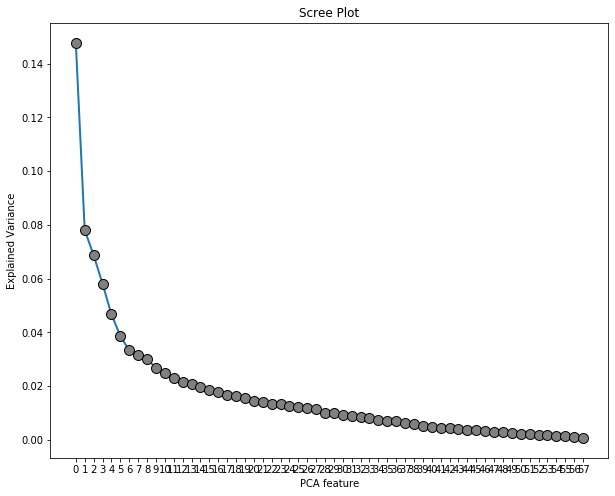

In [25]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
cust_pca = pca.fit_transform(cust_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

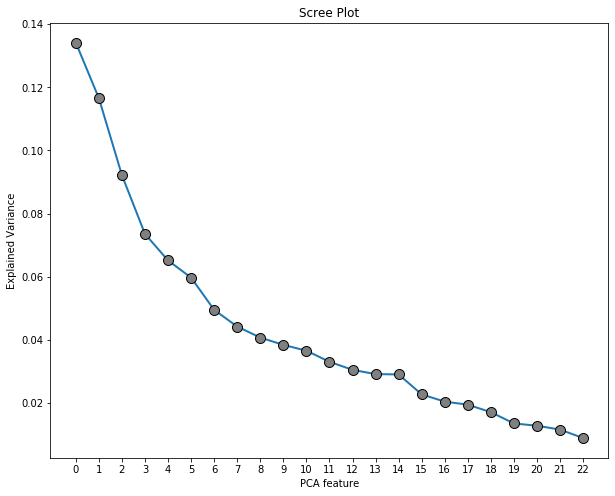

In [26]:
#Splitting for Hult (Personality traits???)
cust_s = cust_scaled.iloc[:, 0:23]
cust_s.head()

#Instantiating PCA object with no limit to principal components for BIG 5
cust_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
cust_pca_fit = cust_pca.fit_transform(cust_s)

#Calling scree plot function
scree_plot(pca_object = cust_pca)

# I am choosing 3 features

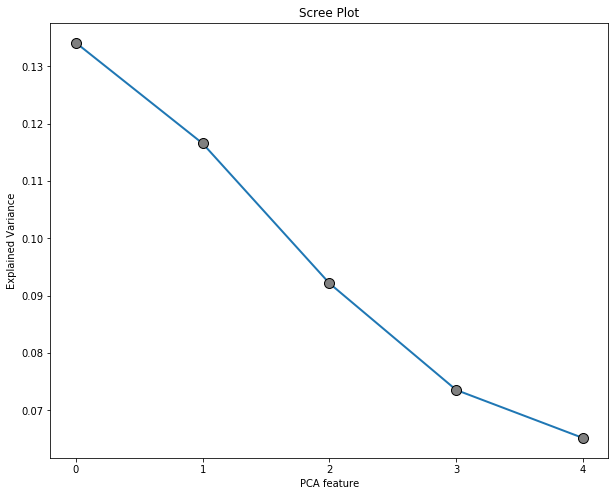

In [27]:
#PCA for BIG 5
pca_5 = PCA(n_components = 5,
           random_state = 802)

#Fitting and Transforming 
cust_pca_5 = pca_5.fit_transform(cust_s)

#Calling the scree_plot function
scree_plot(pca_object = pca_5)

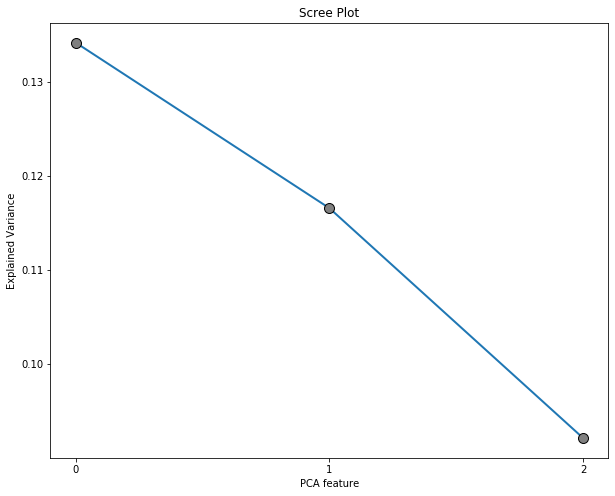

In [28]:
#PCA for personalities
pca_3 = PCA(n_components = 3,
           random_state = 802)

#Fitting and Transforming 
cust_pca_3 = pca_3.fit_transform(cust_s)

#Calling the scree_plot function
scree_plot(pca_object = pca_3)

<h3> Personality Correlation Heatmap

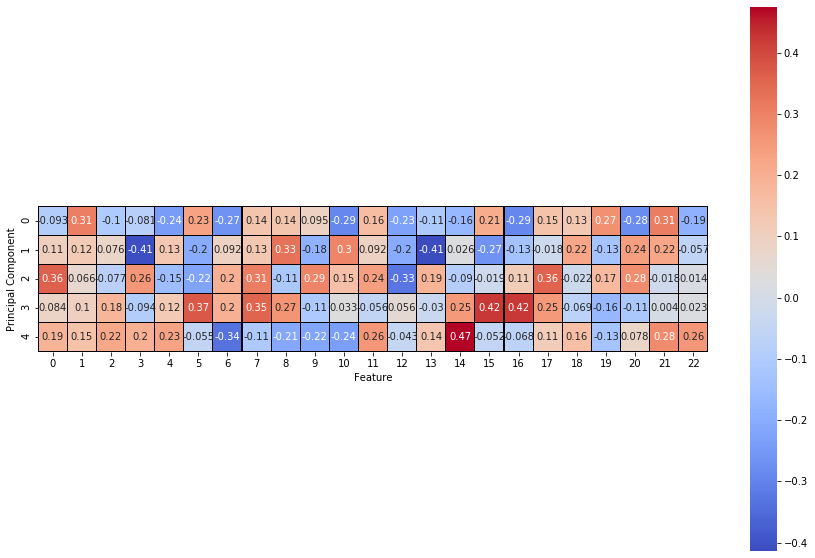

In [29]:
# setting plot size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a PC to feature heatmap
sns.heatmap(pca_5.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')




plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

<h3> Factor Loading- Personalities

In [30]:
#Max PC Model for BIG 5

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(cust_pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(cust_s.columns)


##################
### 5 PC Model ###
##################
# transposing pca components (pc = 5)
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))


# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(cust_s.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


5 Components Factor Loadings
------------------------------
{factor_loadings_5.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                 0     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22
Am the life of the party                     -0.09  0.11  0.36  0.08  0.19  0.26 -0.12 -0.37  0.22 -0.04  0.18 -0.33  0.33  0.08  0.08 -0.09  0.35 -0.13  0.13 -0.22 -0.09 -0.21 -0.09
Feel little concern for others                0.31  0.12  0.07  0.10  0.15  0.11  0.20 -0.33 -0.12  0.02 -0.36  0.43  0.25  0.14  0.12 -0.27 -0.19 -0.22 -0.09  0.02  0.27 -0.11  0.12
Am always prepared                           -0.10  0.08 -0.08  0.18  0.22  0.43 -0.46 -0.03 -0.04 -0.10 -0.04  0.39 -0.12 -0.40  0.08  0.12  0.02  0.09  0.30  0.01  0.02  0.17  0.02
Get stressed out easily                      -0.08 -0.41  0.26 -0.09  0.20 -0.19  0.02  0.14 -0.02 -0.15  0.18  0.09 -0.12 -0.11  0.08 -0.11  0.00 -0.05  0.31  0.34  0.28 -0.50  0.09
Have a rich vocabulary

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [31]:
#factor loadings big 5
factor_loadings_5.columns= ['Introvert', 'Outgoing', 'Scatter Brained', 'Hippie', 'Narcissist']
factor_loadings_5

Introvert  Outgoing  Scatter Brained    Hippie  Narcissist
Am the life of the party                      -0.093450  0.106075         0.362883  0.084430    0.190310
Feel little concern for others                 0.305223  0.123883         0.066227  0.099903    0.146483
Am always prepared                            -0.104368  0.075633        -0.076983  0.183716    0.220318
Get stressed out easily                       -0.080619 -0.406642         0.258589 -0.094181    0.198091
Have a rich vocabulary                        -0.240721  0.131116        -0.153121  0.123024    0.229610
Don't talk a lot                               0.233330 -0.204967        -0.219999  0.374669   -0.055006
Am interested in people                       -0.266610  0.091805         0.199360  0.197744   -0.336715
Leave my belongings around                     0.141191  0.128481         0.309931  0.354816   -0.106411
Am relaxed most of the time                    0.140346  0.330084        -0.113862  0.265799   -0.210670
Have difficulty understanding abstract ideas   0.095260 -0.182551         0.294814 -0.109590   -0.218220
Feel comfortable around people                -0.291408  0.295808         0.154580  0.032852   -0.235592
Insult people                                  0.164626  0.092279         0.241457 -0.056027    0.258487
Pay attention to details                      -0.229365 -0.203467        -0.329642  0.055564   -0.042824
Worry about things                            -0.107991 -0.413246         0.188862 -0.029746    0.137394
Have a vivid imagination                      -0.164175  0.025523        -0.090392  0.250846    0.473991
Keep in the background                         0.208536 -0.266843        -0.019499  0.423236   -0.051905
Sympathize with others' feelings              -0.289986 -0.134708         0.114858  0.423507   -0.068190
Make a mess of things                          0.146740 -0.018492         0.356399  0.248775    0.111579
Seldom feel blue                               0.129441  0.223511        -0.022464 -0.069230    0.156270
Am not interested in abstract ideas            0.272222 -0.130613         0.170809 -0.164939   -0.132140
Start conversations                           -0.275174  0.239020         0.279505 -0.114265    0.078444
Am not interested in other people's problems   0.308520  0.223428        -0.017938  0.003968    0.282816
Get chores done right away                    -0.185518 -0.057482         0.013769  0.023269    0.258039

In [32]:
# analyzing factor strengths per customer
X_pca_reduced = pca_5.transform(cust_s)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_5.columns


# checking the results
X_pca_df

Introvert  Outgoing  Scatter Brained    Hippie  Narcissist
0    -0.024770 -1.067220        -0.350021 -0.057927    1.175583
1     2.016846  0.111887        -0.833090  0.013710    1.697895
2     2.465200 -0.475855         2.638297  0.727032    2.092077
3     1.636288 -2.959016         1.450472 -0.647314   -0.936837
4     1.711784 -1.763718         0.182584  0.256311    0.145903
5    -1.246918  2.030957        -0.674930 -1.350984   -0.255780
6     0.566621 -0.706618        -1.473061 -1.078615   -0.236951
7    -1.057419 -0.510695        -1.933796 -0.829689    1.472347
8    -2.756183 -1.349581        -0.505733 -0.594704   -0.513323
9    -0.948756 -0.122581         0.079213  2.326737   -1.108979
10   -0.678999  2.382749         1.031737 -1.914098   -0.894462
11    0.390499 -1.520673        -0.139058  4.237572    0.014589
12    0.170777 -1.748402        -0.361066  0.762534   -0.469035
13    0.325384  0.158756        -0.547014 -0.945635   -1.119879
14   -0.729457  1.723814        -1.113223  0.955388   -0.506596
15    2.132400 -0.257639         1.820078 -0.882938    2.606843
16   -3.188953 -2.220860         1.384866 -1.701683   -1.069996
17    1.882222 -0.895701        -0.780062 -0.165760   -0.806480
18    2.503223 -0.169671        -2.314843 -0.842419    0.251048
19    1.406419 -0.757105        -0.909586  0.648649   -1.486882
20    1.125445 -2.052236         0.796362  0.561339    0.783247
21   -0.845246  1.976881        -0.521079 -0.851671    0.297208
22    0.679585 -2.250590         0.698617 -0.224857    0.762901
23   -1.806883 -2.931538        -2.078796 -0.618872    1.265017
24   -1.922001 -0.626980        -0.465161 -0.443318   -0.416062
25   -0.152818  1.737568        -2.598469  0.919426    0.250910
26    0.043908  0.653277         1.903494 -0.747238    1.193460
27   -1.154688  0.738658        -1.975168 -0.389658   -0.411969
28    1.332626 -0.420790         0.616724 -1.148387    0.379649
29    0.154981  2.079186        -0.795900  0.531528    0.961658
30   -0.363261 -2.391048         0.920048  0.288294   -0.551330
31   -1.158877  2.359268         0.960517 -0.449429   -0.673150
32    1.160924 -0.491325        -1.805834  0.199221   -0.329636
33   -1.884011  3.175544         0.179863  1.927223    0.023061
34    1.272341  0.018047         0.980194 -0.276330   -1.358121
35    1.416436 -0.679128         3.033492 -0.947039   -0.235144
36   -2.696185  0.329046         0.264606 -1.273987   -0.862187
37   -1.636003 -1.951677         1.230132 -1.487387   -0.655953
38   -0.273592  0.251975        -1.625367 -1.387254    0.045850
39   -2.387365 -0.966328         0.387846 -1.889682    0.137253
40   -1.578130 -1.603320        -0.102186  0.059918    0.799216
41    1.038071 -2.364957        -0.547672  0.872754    0.115247
42    2.227441 -1.716242         1.247107  0.448249   -1.152955
43    2.795821 -0.691416        -0.179874 -1.400243    2.021697
44    1.656236 -0.732302         1.610177  0.350684   -1.390852
45   -1.841051 -1.215429         1.654790  0.848226   -0.978645
46   -2.385441 -2.608298        -0.517138  2.012221    0.257970
47   -0.309367  0.847283        -1.903403  1.878072   -0.442712
48   -0.053899  0.187352        -0.693505 -1.340840    0.771236
49    0.279842  3.154321        -1.370349 -1.824594   -0.455030
50    1.613545  3.734326         1.050335  0.780665   -1.391737
51    0.012841  1.227344        -0.086780 -1.850250   -0.356908
52   -0.278273  0.693497        -2.375579  1.554491    0.571433
53   -0.128674 -1.026758         0.689760  1.989678   -1.234649
54    1.804125 -0.277666        -1.573026  0.185693    0.480252
55    1.069925 -0.254854         0.718253  1.188742    0.646590
56   -0.067782 -1.156247         0.844457 -1.107970    0.717430
57   -1.088662 -0.550763        -1.276936  3.176755   -0.249055
58    1.223360 -2.900590        -0.792973  0.806443    0.249334
59   -0.385016  2.804433        -0.789552 -2.388573    2.836427
60   -0.348270  1.459340        -3.590272  1.397103    0.630714
61   -0.008799 -1.228572         0.60

The likelihood of someone purchasing a computer based on these top five personalities was evaluated through standard deviation. Extroverts seem to have more interest and intrigue in purchasing habits. Whether a customer is outgoing or not, does not affect behaviour. Hippies are more relaxed and tend to be less stressed would rather buy a Mac. People who are less selfish buy more macs than windows.  This insight may also say that stressed out college students or busy entrepreneurs probably buy more Apple products. 

In [33]:
#Introvert
len(X_pca_df['Introvert'][X_pca_df['Introvert'] > 0.5])/\
len(X_pca_df)

0.38016528925619836

In [34]:
len(X_pca_df['Introvert'][X_pca_df['Introvert'] < -0.5])/\
len(X_pca_df)
#these customers are probably more extroverted

0.4049586776859504

In [35]:
#Outgoing
len(X_pca_df['Outgoing'][X_pca_df['Outgoing'] > 0.5])/\
len(X_pca_df)

0.4049586776859504

In [36]:
len(X_pca_df['Outgoing'][X_pca_df['Outgoing'] < -0.5])/\
len(X_pca_df)

0.4049586776859504

In [37]:
#scatter brained
len(X_pca_df['Scatter Brained'][X_pca_df['Scatter Brained'] > 0.5])/\
len(X_pca_df)

0.36363636363636365

In [38]:
len(X_pca_df['Scatter Brained'][X_pca_df['Scatter Brained'] < -0.5])/\
len(X_pca_df)

0.36363636363636365

In [39]:
#Hippie
len(X_pca_df['Hippie'][X_pca_df['Hippie'] > 0.5])/\
len(X_pca_df)

0.371900826446281

In [40]:
len(X_pca_df['Hippie'][X_pca_df['Hippie'] < -0.5])/\
len(X_pca_df)

0.4049586776859504

In [41]:
#Narcissist
len(X_pca_df['Narcissist'][X_pca_df['Narcissist'] > 0.5])/\
len(X_pca_df)

0.32231404958677684

In [42]:
len(X_pca_df['Narcissist'][X_pca_df['Narcissist'] < -0.5])/\
len(X_pca_df)

0.34710743801652894

<h2> Hult DNA Traits PCA 

In [43]:
#Removing Categorical (Demographics), SurveyID and HULT DNA from Data to generate Personality Traits only
hult_df= cust_df.copy()
hult_df = hult_df.drop(['What laptop do you currently have?', 
                            'What laptop would you buy in next assuming if all laptops cost the same?',
                            'What program are you in?', 
                            'What is your age?', 
                            'What is your ethnicity?', 
                            'Gender', 
                            'What is your nationality? ', 
                            'surveyID',
                            'Am the life of the party', 'Feel little concern for others', 
                            'Am always prepared', 'Get stressed out easily', 'Have a rich vocabulary', 
                            "Don't talk a lot", 'Am interested in people', 'Leave my belongings around', 
                            'Am relaxed most of the time', 'Have difficulty understanding abstract ideas', 
                            'Feel comfortable around people', 'Insult people', 'Pay attention to details', 
                            'Worry about things', 'Have a vivid imagination', 'Keep in the background', 
                            "Sympathize with others' feelings", 'Make a mess of things', 'Seldom feel blue', 
                            'Am not interested in abstract ideas', 'Start conversations', 
                            "Am not interested in other people's problems", 'Get chores done right away', 
                            'Am easily disturbed', 'Have excellent ideas', 'Have little to say', 
                            'Have a soft heart', 'Often forget to put things back in their proper place', 
                            'Get upset easily', 'Do not have a good imagination', 
                            'Talk to a lot of different people at parties', 
                            'Am not really interested in others', 'Like order',
       'Change my mood a lot', 'Am quick to understand things', "Don't like to draw attention to myself", 
                            'Take time out for others', 'Shirk my duties', 'Have frequent mood swings', 
                            'Use difficult words', "Don't mind being the center of attention", 
                            "Feel others' emotions", 'Follow a schedule', 'Get irritated easily', 
                            'Spend time reflecting on things', 'Am quiet around strangers', 
                            'Make people feel at ease', 'Am exacting in my work', 'Often feel blue' 
                            ],
                             axis = 1)
    

In [44]:
#Scaling the data

scaler = StandardScaler()
scaler.fit(hult_df)
X_scaled1 = scaler.transform(hult_df)

#Converting scaled data into a dataframe
hult_scaled = pd.DataFrame(X_scaled1)

#Reattaching column names
hult_scaled.columns = hult_df.columns

#Checking pre- and post scaling variance
print(pd.np.var(hult_df), '\n\n')
print(pd.np.var(hult_scaled))



Am full of ideas                                                              0.735332
See underlying patterns in complex situations                                 0.535483
Don't  generate ideas that are new and different                              1.102657
Demonstrate an awareness of personal strengths and limitations                0.537122
Display a growth mindset                                                      0.490540
Respond effectively to multiple priorities                                    0.520046
Take initiative even when circumstances objectives or rules aren't clear      0.763063
Encourage direct and open discussions                                         0.585069
Respond effectively to multiple priorities.1                                  0.462810
Take initiative even when circumstances objectives or rules aren't clear.1    0.694215
Encourage direct and open discussions.1                                       0.569633
Listen carefully to others                 

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [45]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
hult_pca = pca.fit_transform(hult_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", hult_scaled.shape)
print("PCA shape     :",  hult_pca.shape)

Original shape: (121, 22)
PCA shape     : (121, 22)


In [46]:
pd.DataFrame(hult_pca)

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21
0    0.248292  0.163850 -0.251121 -0.109979  0.274515 -0.398686  0.001260  0.238110  0.076399 -0.238811 -0.283295 -0.010440  0.807177 -0.593072  0.013548  0.079557 -0.199383  0.172085  0.135587  0.018397  0.024947  0.052793
1   -1.192979 -0.637551  0.128265  0.626461  0.300448  1.680787 -2.959843  2.365296  0.528234 -0.190264 -1.350591  1.641543 -1.758343 -0.739401  1.008138  0.318176 -0.087309 -0.540346  0.076974 -0.012031  0.199477  0.333167
2    4.695198  0.056827  1.589714 -0.987176  0.235341  0.268399  0.716523 -1.308183  0.411131  0.539375 -1.054412 -1.475805  1.446103  0.249980 -0.376044 -0.561266  0.367086  0.519324 -0.431784 -0.050785  0.467923  0.350053
3    3.316241  0.974248  0.072106  1.502682  0.446502 -0.182876  0.982838  1.512225 -0.086206 -1.139100  0.041589  0.270697 -0.879390 -0.684707  0.190657 -0.418875  0.498514 -0.232492 -0.015213  0.283251 -0.220887 -0.073920
4   -0.610511  1.230319 -0.169225  0.965282 -0.058344  0.526610 -0.192929 -0.044322  0.051346  2.039027  1.313408  1.267954  0.020617 -0.219332  0.077564 -0.563979  0.036919 -0.716196 -0.426902 -0.595920  0.020444  0.647813
5   -0.096387  0.319692 -1.126069 -0.043057  0.289410 -1.152020  0.033804  0.092953  0.417562 -0.078418 -0.371451 -0.256729  0.554315 -0.978291  0.555686  0.080954 -0.681905  0.407426  0.023103 -0.227649  0.045930  0.224225
6    1.061111  1.056730  0.107286 -0.673955 -0.084368 -0.778095  0.337628  0.217228  1.196555  0.589460 -0.020080  0.453739  0.045616 -0.117732 -0.620380  0.374532 -0.704537 -0.219053 -0.237571  0.096200  0.024701 -0.065661
7   -2.810495 -0.177153  0.601626  1.667386  0.044934 -0.186212  0.421224  0.760458 -1.657395  0.451826  0.223686 -0.085252  0.411682  0.474177  0.403526 -0.717420  0.683458 -0.275788  0.105706 -0.256852  0.017625 -0.088913
8    0.978008  1.068385 -1.047812 -0.883953 -0.427029  1.235554 -0.455138  0.788444  1.318804 -0.346161 -0.519686  0.142661  0.212862 -1.130719 -0.094540 -0.282361 -0.251348  0.294826 -0.572847  0.098539  0.937724 -0.061209
9   -1.680018  1.322122 -1.099443  0.259929 -0.729815  0.552884 -0.137423 -0.530199 -0.521661 -0.616489  0.172004  0.147210 -0.700887 -0.227447 -0.993800 -0.329564  0.023796 -0.135791  0.226892  0.499043 -0.283341 -0.077982
10   0.276241  0.831977  0.549662  1.624472  0.678442 -0.998416 -0.445685  0.505085  0.426155  1.224655  0.470118  0.031970  2.644120 -1.085844 -0.657498 -0.151101  0.447084 -0.463889  0.971108 -0.310186 -0.053207 -0.067755
11  -1.262062  1.171265  0.471957  0.885127  1.724581  1.904351  0.870203 -1.289021 -0.158524 -0.545834 -0.699404 -0.316289 -0.179372  0.894937 -0.604548 -0.935562 -0.183560  1.582475  1.082329  0.471962  0.453325  0.203917
12   0.419062 -0.165026  0.315732 -1.290329  0.109499 -0.993109 -0.446983  0.572212 -0.043087  1.046930  0.250999 -0.108831 -0.388798  0.564641  0.106139  0.201110 -0.522474  0.362661 -0.474772  0.090784  0.126873  0.050942
13  -3.403596  0.797998  3.133154 -2.875698 -0.630020 -0.532330  1.574785 -1.987758  0.243104 -0.881175  0.221735  0.512996 -1.244227 -0.188995  0.516283 -0.021624 -0.223048  0.171494  0.391293 -0.017346  0.130917 -0.102057
14  -0.957164 -0.230839 -2.394238 -1.085759 -2.459270  0.449410  1.133570 -1.489718 -0.547101 -1.054861  0.761124  1.469357 -0.137731 -0.531807  1.202429 -0.572054  0.737776  1.335205 -0.340389  0.119797  0.220478 -0.052793
15   0.706296  0.727889  1.559493 -0.432537  0.884992 -0.217263 -0.535828 -1.015316  0.484865  0.271823  0.157488  0.694434  0.316602 -0.319925 -0.278114 -0.170710 -0.206580 -0.502881 -0.269185  0.014319  0.015449 -0.003681
16   0.226906  0.931582  0.001619 -0.904354 -0.154321 -1.111778 -1.410728  0.858709 -0.094306  1.248148 -0.361521  0.092359  0.031400  0.193952 -0.456282 -0.274750  0.093352  0.326939 -1.075327  0.405979 

In [47]:
# component number counter
component_number = 0
sum=0
# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    sum=sum+variance
    print(f"PC {component_number}    : {variance.round(3)}    : {sum.round(2)}")

PC 1    : 0.35    : 0.35
PC 2    : 0.081    : 0.43
PC 3    : 0.067    : 0.5
PC 4    : 0.059    : 0.56
PC 5    : 0.053    : 0.61
PC 6    : 0.047    : 0.66
PC 7    : 0.044    : 0.7
PC 8    : 0.04    : 0.74
PC 9    : 0.035    : 0.77
PC 10    : 0.032    : 0.81
PC 11    : 0.029    : 0.84
PC 12    : 0.028    : 0.86
PC 13    : 0.025    : 0.89
PC 14    : 0.021    : 0.91
PC 15    : 0.019    : 0.93
PC 16    : 0.017    : 0.94
PC 17    : 0.016    : 0.96
PC 18    : 0.014    : 0.98
PC 19    : 0.01    : 0.99
PC 20    : 0.006    : 0.99
PC 21    : 0.005    : 1.0
PC 22    : 0.003    : 1.0


In [48]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

1.0


<h3> Principal Component Analysis for Hult

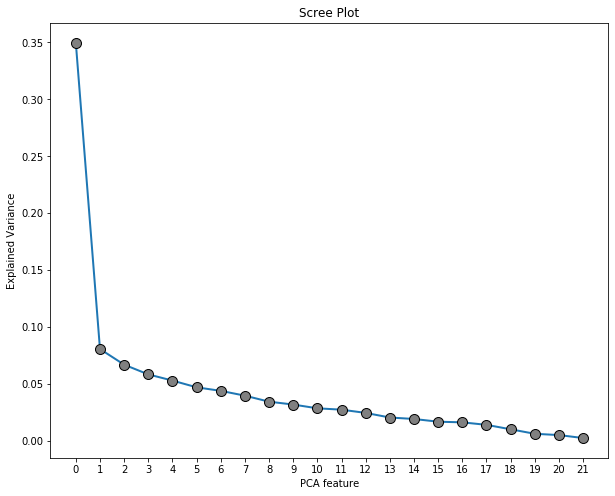

In [49]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_pca = pca.fit_transform(hult_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

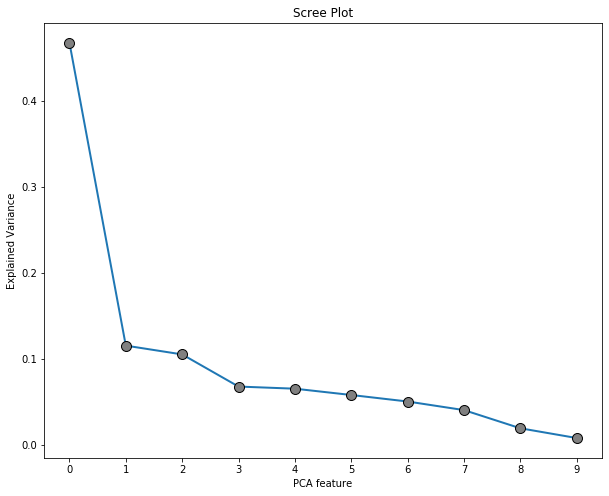

In [50]:
#Splitting for Hult DNA traits
hult_s = hult_scaled.iloc[:, 0:10]
hult_s.head()

#Instantiating PCA object with no limit to principal components for BIG 5
hult_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
hult_pca_fit = hult_pca.fit_transform(hult_s)

#Calling scree plot function
scree_plot(pca_object = hult_pca)



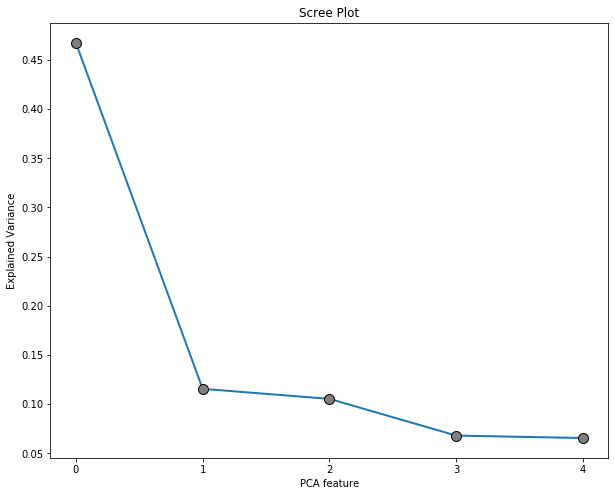

In [51]:
#PCA for BIG 5
pca_5h = PCA(n_components = 5,
           random_state = 802)

#Fitting and Transforming 
hult_pca_5 = pca_5h.fit_transform(hult_s)

#Calling the scree_plot function
scree_plot(pca_object = pca_5h)

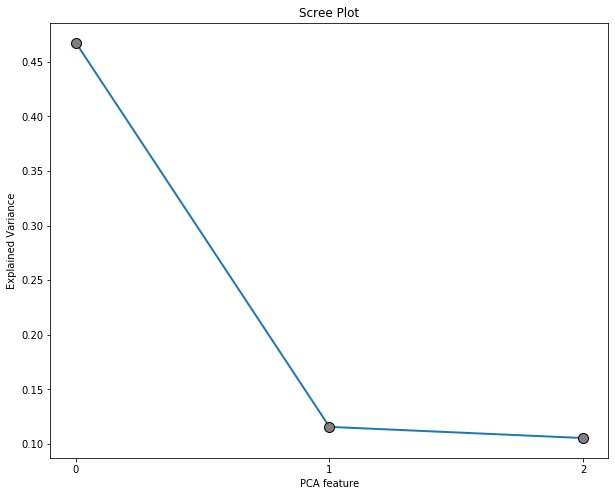

In [52]:
#PCA for HULT DNA
pca_3h = PCA(n_components = 3,
           random_state = 802)

#Fitting and Transforming 
hult_pca_3 = pca_3h.fit_transform(hult_s)

#Calling the scree_plot function
scree_plot(pca_object = pca_3h)

<h3> Hult Correlation Heatmap

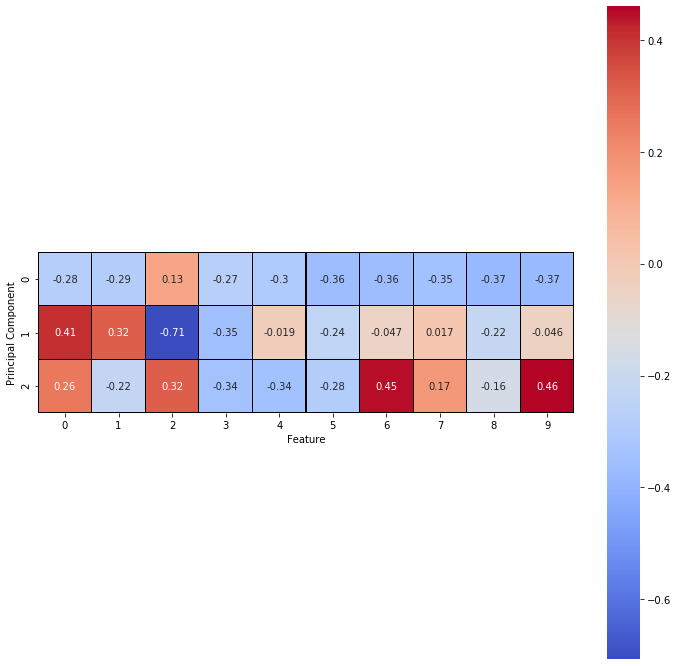

In [53]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca_3h.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')




plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

<h3> Factor Loading - Hult

In [54]:
#Max PC Model for BIG 3 in hult

# transposing pca components (pc = MAX)
factor_loadings_hult = pd.DataFrame(pd.np.transpose(hult_pca.components_))


# naming rows as original features
factor_loadings_hult = factor_loadings_hult.set_index(hult_s.columns)


##################
### 5 PC Model ###
##################
# transposing pca components (pc = 5)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3h.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(hult_s.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings_hult.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                                                               0     1     2     3     4     5     6     7     8     9
Am full of ideas                                                           -0.28  0.41  0.26  0.51  0.13  0.08 -0.46 -0.44 -0.05 -0.01
See underlying patterns in complex situations                              -0.29  0.32 -0.22  0.23  0.59 -0.07  0.57  0.17  0.05 -0.01
Don't  generate ideas that are new and different                            0.13 -0.71  0.32  0.36  0.34  0.28  0.17 -0.17  0.05 -0.02
Demonstrate an awareness of personal strengths and limitations             -0.27 -0.35 -0.34  0.53 -0.22 -0.40 -0.22  0.37 -0.13  0.06
Display a growth mindset                                                   -0.30 -0.02 -0.34  0.15 -0.53  0.51  0.37 -0.30 -0.02 -0.06
Respond effectively to multiple priorities                                 -0.36 -0.24 -0.28 -0.29  0.19 -0.14 -0.20 -0.33  0.6

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


In [55]:
factor_loadings_3.columns= ['Follower', 'Creative', 'Reactive']
factor_loadings_3

Follower  Creative  Reactive
Am full of ideas                                                           -0.277164  0.408413  0.257229
See underlying patterns in complex situations                              -0.286129  0.318365 -0.224737
Don't  generate ideas that are new and different                            0.132555 -0.706373  0.315974
Demonstrate an awareness of personal strengths and limitations             -0.269861 -0.347772 -0.339479
Display a growth mindset                                                   -0.299276 -0.019477 -0.344160
Respond effectively to multiple priorities                                 -0.362711 -0.238864 -0.284095
Take initiative even when circumstances objectives or rules aren't clear   -0.363372 -0.046901  0.449930
Encourage direct and open discussions                                      -0.345753  0.017315  0.169698
Respond effectively to multiple priorities.1                               -0.373985 -0.223407 -0.162253
Take initiative even when circumstances objectives or rules aren't clear.1 -0.371942 -0.045707  0.459919

In [56]:
# analyzing factor strengths per customer
X_pca_reduced_h = pca_3h.transform(hult_s)


# converting to a DataFrame
X_pca_df_h = pd.DataFrame(X_pca_reduced_h)


# renaming columns
X_pca_df_h.columns = factor_loadings_3.columns


# checking the results
X_pca_df_h

Follower  Creative  Reactive
0    0.350823 -0.112597 -0.175088
1   -0.684126  0.952114  1.586649
2    3.294261 -0.921530 -0.195354
3    2.033447  0.447839 -1.000797
4    0.465734 -0.759403 -0.880637
5    0.350823 -0.112597 -0.175088
6    1.465673 -1.349425 -0.640337
7   -2.809230 -0.234137 -0.696011
8    2.084389  0.801705 -0.384989
9   -0.790707  0.770933 -0.673620
10   0.629043 -1.539672 -1.238236
11  -0.729049  1.450544 -0.868234
12   0.671083 -1.416761  1.033809
13  -3.470550 -1.990914  0.722324
14  -0.548724  1.918146 -0.511317
15   0.603290 -1.457973  0.426724
16   0.994301 -1.893036  0.733839
17   6.535702  1.416182 -0.554455
18   1.401381  0.170687  1.158527
19   2.243490 -0.722011 -1.384956
20  -3.421949  0.054959  0.310993
21   0.027605  0.363679  0.124882
22   3.687201 -0.497451 -0.445388
23  -3.098731 -0.421316  0.011023
24  -0.076478 -0.140405 -0.666475
25  -1.610949  0.319046 -0.914972
26   0.027605  0.363679  0.124882
27  -2.685570 -2.033152 -0.172312
28  -1.107259  0.892547 -2.674040
29  -0.834778  0.255131  1.191944
30  -0.067677  0.556800  1.257747
31  -2.217071 -0.081270  0.528462
32   0.027605  0.363679  0.124882
33   0.027605  0.363679  0.124882
34   0.965937  0.943460  1.254770
35   2.578488  1.288725  1.536310
36  -1.686858 -0.523574 -0.708597
37  -0.692621 -1.165209 -1.144616
38   0.454906  0.391488  0.616269
39   1.508740 -2.445512 -0.034758
40  -1.400623 -0.682991  0.995253
41   0.175758  1.383566 -0.949325
42   3.162690 -0.003534  1.467988
43   3.268594  1.396328  2.035691
44   2.211266  0.396202  0.250274
45  -0.686624  1.275017  0.117737
46  -2.832024  0.675450 -0.539917
47   2.007795  0.063288 -2.916295
48   1.146341  0.389737  0.779508
49   1.264054  0.140540 -1.971656
50   3.732443  0.992549  0.208851
51   1.110050 -0.073135  0.595237
52  -1.669106  1.200759  1.685592
53   0.605864 -0.331646  0.203932
54  -2.278489  0.030571  0.252376
55   2.171680 -0.401543  0.323006
56   0.603290 -1.457973  0.426724
57  -0.319523  0.154203 -0.384358
58   2.279780 -0.259139 -1.200684
59  -1.736255  1.426731  1.412864
60  -2.986868  0.135698 -1.247455
61  -3.607268  1.174363 -0.018091
62  -0.098629  1.036367 -0.176024
63  -1.025096 -0.295944 -0.507570
64  -3.458239 -0.407913  0.126721
65   0.477057 -0.785285  0.125818
66  -3.135021 -0.884188 -0.173248
67  -0.586944  0.596132 -0.138439
68  -2.847491  0.332907 -0.163749
69   0.763754  1.144915 -1.243085
70   1.957059 -0.097853  1.249658
71  -0.051511  0.348349 -1.488658
72   0.027605  0.363679  0.124882
73  -3.975484  0.699838 -0.481300
74   0.350823 -0.112597 -0.175088
75   0.696050 -0.928007  0.211626
76  -1.388312  0.900010  0.399651
77   3.384258  0.980070  1.331004
78  -2.554567  1.833986  0.614362
79   1.730450 -1.111800 -0.634128
80  -3.596783 -1.318226  0.421418
81  -0.040188  0.322467 -0.482203
82  -3.057534  1.502756  0.220411
83   0.868068 -1.220348  0.432933
84  -1.328968  0.746580 -1.359921
85  -0.582310 -1.090245  1.793755
86   1.097456 -1.823949 -1.103546
87   1.873628 -1.887864  1.003370
88  -3.975484  0.699838 -0.481300
89   1.730745  1.276814 -0.048094
90  -3.193462 -0.170288  0.132931
91   4.030694  0.027519  0.731064
92  -0.815431  0.821379  0.039624
93   0.674041 -0.588872 -0.475057
94   0.201915 -0.573753  3.895777
95  -1.546792  0.675753  0.359325
96  -1.219938 -0.116017 -0.607857
97   4.030694  0.027519  0.731064
98  -2.334589 -0.947535  1.585693
99   4.133606 -0.442593 -0.997382
100 -0.098629  1.036367 -0.176024
101 -2.677000  1.533401  0.867248
102 -2.224974  1.510764  0.645391
103  1.711104 -1.678048  0.518192
104 -2.922783  1.359461  0.151153
105  3.860345  3.026348 -0.967128
106  3.571074 -0.030178  0.624568
107 -3.470550 -1.990914  0.722324
108  1.297014 -0.501210 -1.927214
109 -2.682996 -0.906826 -0.395105
110  4.030694  0.027519  0.731064
111  2.308709 -1.807125 -0.555079
112  0.918804 -1.059207 -3.733020
113  0.834594 -0.017694 -0.083070
114  0.336545  1.326384 -0.389157
115 -2.559336 -2.705840  0.128594
116 -1.820614 -0.798277 -1.

Those who do not follow others and think for themselves are more likely to buy a mac. Creative users and up beat customers would buy a mac over Windows. Referring to the Hult DNA, driven and hardworking customers are looking for a product that can keep up with what they aim to achieve.

In [57]:
#follower
len(X_pca_df_h['Follower'][X_pca_df_h['Follower'] > 0.5])/\
len(X_pca_df_h)

0.4049586776859504

In [58]:
len(X_pca_df_h['Follower'][X_pca_df_h['Follower'] < -0.5])/\
len(X_pca_df_h)

0.4132231404958678

In [59]:
#Creative
len(X_pca_df_h['Creative'][X_pca_df_h['Creative'] > 0.5])/\
len(X_pca_df_h)

0.32231404958677684

In [60]:
len(X_pca_df_h['Creative'][X_pca_df_h['Creative'] < -0.5])/\
len(X_pca_df_h)

0.30578512396694213

In [61]:
#Reactive
len(X_pca_df_h['Reactive'][X_pca_df_h['Reactive'] > 0.5])/\
len(X_pca_df_h)

0.2892561983471074

In [62]:
len(X_pca_df_h['Reactive'][X_pca_df_h['Reactive'] < -0.5])/\
len(X_pca_df_h)

0.2809917355371901

<h2> Clustering

In [63]:
# checking variance amongst clusters
np.var(X_pca_df)

Introvert          3.084841
Outgoing           2.680809
Scatter Brained    2.119755
Hippie             1.692051
Narcissist         1.499427
dtype: float64

In [64]:
# checking variance amongst clusters
np.var(X_pca_df_h)

Follower    4.675265
Creative    1.156400
Reactive    1.054212
dtype: float64

In [65]:
########################################
### Personality
########################################

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Introvert',      
                     'Outgoing', 
                     'Scatter Brained',   
                     'Hippie', 
                     'Narcissist'] 

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))


Introvert          3.084841
Outgoing           2.680809
Scatter Brained    2.119755
Hippie             1.692051
Narcissist         1.499427
dtype: float64 


Introvert          1.0
Outgoing           1.0
Scatter Brained    1.0
Hippie             1.0
Narcissist         1.0
dtype: float64


/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [66]:
########################################
### HULT
########################################
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df_h)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df_h)


# converting scaled data into a DataFrame
pca_scaled_1 = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled_1.columns = ['Follower',      
                     'Creative', 
                     'Reactive'] 

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df_h), '\n\n')
print(pd.np.var(pca_scaled_1))

Follower    4.675265
Creative    1.156400
Reactive    1.054212
dtype: float64 


Follower    1.0
Creative    1.0
Reactive    1.0
dtype: float64


/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


<h3> Agglomerative Clustering

Agglomerative clustering starts with each observation in its own cluster. We are using the WARD method  for calculating the distance which  will  minimizes the variance amongst all clusters and leads to clusters that are relatively equal in size. Our number of clusters cuts in half as certain colors seem to create stronger niches than others.

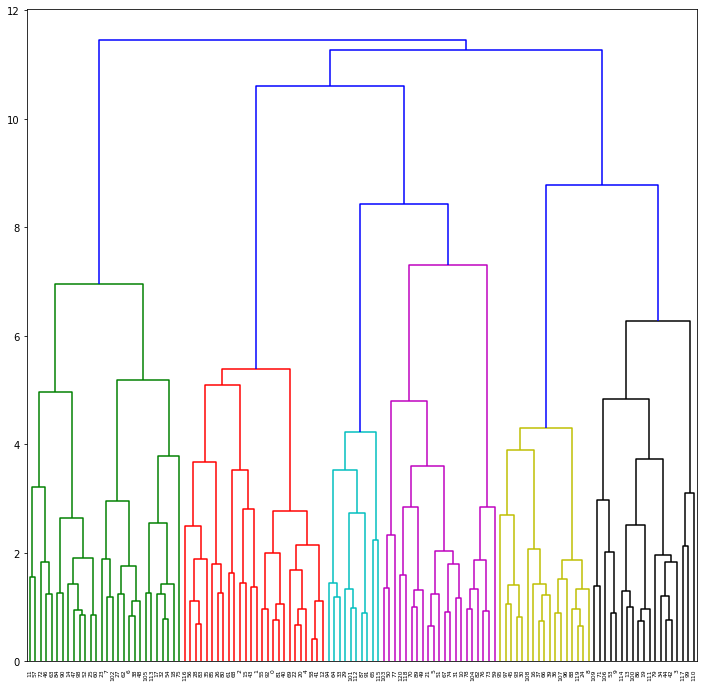

In [67]:
# grouping data for personality
standard_mergings_pers = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_pers,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

Personality reflects on this as our clusters are based off of the variance within these traits, showing orange and green (the first two) as potential strong niches. 

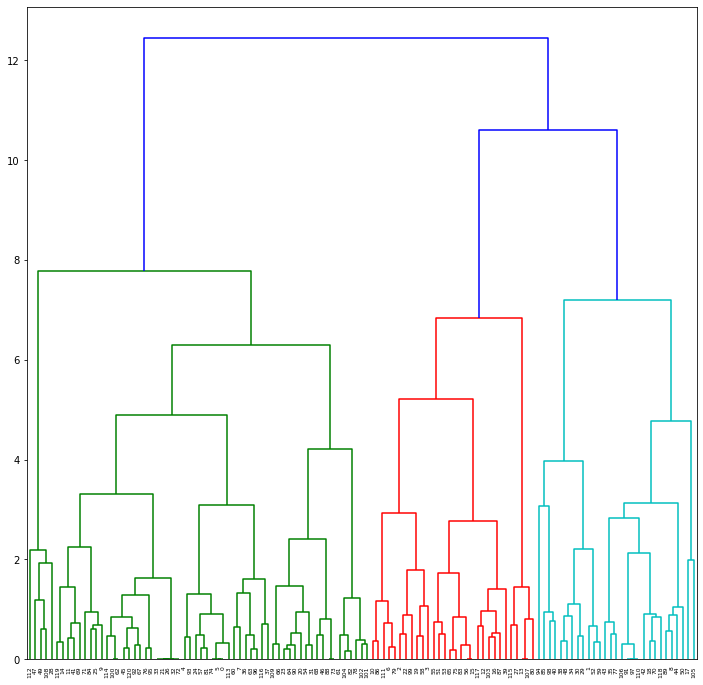

In [68]:
# grouping data for personality
standard_mergings_hult = linkage(y = pca_scaled_1,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_hult,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

The first cluster creates their own specific niche seen in hult DNA. Three clusters seem to be the strongest for this dataframe.

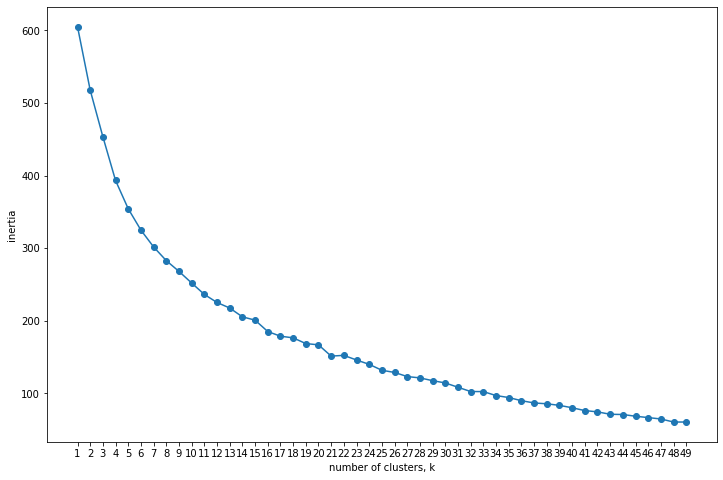

In [69]:
# calling the inertia_plot() function for personality
interia_plot(data = pca_scaled)

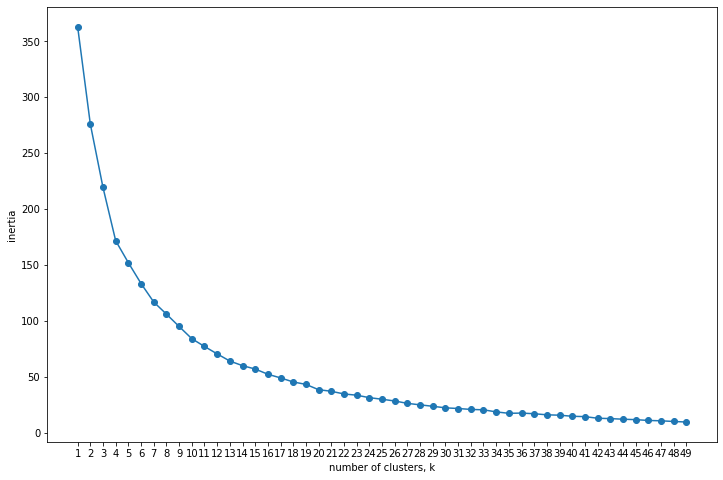

In [70]:
# calling the inertia_plot() function for huly traits
interia_plot(data = pca_scaled_1)

In [71]:
# INSTANTIATING a k-Means object with clusters for personality
customers_k_pca = KMeans(n_clusters   = 6,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster_p': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    25
0    23
2    22
5    18
4    18
3    15
Name: Cluster_p, dtype: int64


In [72]:
# INSTANTIATING a k-Means object with clusters for hult trains
customers_k_pca_h = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
customers_k_pca_h.fit(pca_scaled_1)


# converting the clusters to a DataFrame
customers_kmeans_pca_h = pd.DataFrame({'Cluster_h': customers_k_pca_h.labels_})


# checking the results
print(customers_kmeans_pca_h.iloc[: , 0].value_counts())

1    35
4    23
3    23
2    21
0    19
Name: Cluster_h, dtype: int64


<h3> Storing Cluster Centers for Personality and Hult

In [73]:
# storing cluster centers- personality
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Introvert',      
                     'Outgoing', 
                     'Scatter Brained',   
                     'Hippie', 
                     'Narcissist'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

Introvert  Outgoing  Scatter Brained  Hippie  Narcissist
0      -0.19     -1.21             0.32    0.13       -0.27
1      -1.03      0.55             0.15   -0.67        0.18
2       0.73      0.53            -0.02   -0.18       -1.18
3       0.72      0.15             1.41    0.32        1.00
4       0.57     -0.51            -0.97   -0.58        0.59
5      -0.38      0.54            -0.79    1.31        0.11

In [74]:
# storing cluster centers- hult
centroids_pca_h = customers_k_pca_h.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df_h = pd.DataFrame(centroids_pca_h)


# renaming principal components
centroids_pca_df_h.columns = ['Follower',      
                     'Creative', 
                     'Reactive'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df_h.round(2)

Follower  Creative  Reactive
0      0.57     -0.49     -1.39
1     -0.67      0.04     -0.29
2     -0.18     -1.38      0.81
3     -0.58      1.14      0.31
4      1.29      0.47      0.55

In [75]:
X_pca_df_h

Follower  Creative  Reactive
0    0.350823 -0.112597 -0.175088
1   -0.684126  0.952114  1.586649
2    3.294261 -0.921530 -0.195354
3    2.033447  0.447839 -1.000797
4    0.465734 -0.759403 -0.880637
5    0.350823 -0.112597 -0.175088
6    1.465673 -1.349425 -0.640337
7   -2.809230 -0.234137 -0.696011
8    2.084389  0.801705 -0.384989
9   -0.790707  0.770933 -0.673620
10   0.629043 -1.539672 -1.238236
11  -0.729049  1.450544 -0.868234
12   0.671083 -1.416761  1.033809
13  -3.470550 -1.990914  0.722324
14  -0.548724  1.918146 -0.511317
15   0.603290 -1.457973  0.426724
16   0.994301 -1.893036  0.733839
17   6.535702  1.416182 -0.554455
18   1.401381  0.170687  1.158527
19   2.243490 -0.722011 -1.384956
20  -3.421949  0.054959  0.310993
21   0.027605  0.363679  0.124882
22   3.687201 -0.497451 -0.445388
23  -3.098731 -0.421316  0.011023
24  -0.076478 -0.140405 -0.666475
25  -1.610949  0.319046 -0.914972
26   0.027605  0.363679  0.124882
27  -2.685570 -2.033152 -0.172312
28  -1.107259  0.892547 -2.674040
29  -0.834778  0.255131  1.191944
30  -0.067677  0.556800  1.257747
31  -2.217071 -0.081270  0.528462
32   0.027605  0.363679  0.124882
33   0.027605  0.363679  0.124882
34   0.965937  0.943460  1.254770
35   2.578488  1.288725  1.536310
36  -1.686858 -0.523574 -0.708597
37  -0.692621 -1.165209 -1.144616
38   0.454906  0.391488  0.616269
39   1.508740 -2.445512 -0.034758
40  -1.400623 -0.682991  0.995253
41   0.175758  1.383566 -0.949325
42   3.162690 -0.003534  1.467988
43   3.268594  1.396328  2.035691
44   2.211266  0.396202  0.250274
45  -0.686624  1.275017  0.117737
46  -2.832024  0.675450 -0.539917
47   2.007795  0.063288 -2.916295
48   1.146341  0.389737  0.779508
49   1.264054  0.140540 -1.971656
50   3.732443  0.992549  0.208851
51   1.110050 -0.073135  0.595237
52  -1.669106  1.200759  1.685592
53   0.605864 -0.331646  0.203932
54  -2.278489  0.030571  0.252376
55   2.171680 -0.401543  0.323006
56   0.603290 -1.457973  0.426724
57  -0.319523  0.154203 -0.384358
58   2.279780 -0.259139 -1.200684
59  -1.736255  1.426731  1.412864
60  -2.986868  0.135698 -1.247455
61  -3.607268  1.174363 -0.018091
62  -0.098629  1.036367 -0.176024
63  -1.025096 -0.295944 -0.507570
64  -3.458239 -0.407913  0.126721
65   0.477057 -0.785285  0.125818
66  -3.135021 -0.884188 -0.173248
67  -0.586944  0.596132 -0.138439
68  -2.847491  0.332907 -0.163749
69   0.763754  1.144915 -1.243085
70   1.957059 -0.097853  1.249658
71  -0.051511  0.348349 -1.488658
72   0.027605  0.363679  0.124882
73  -3.975484  0.699838 -0.481300
74   0.350823 -0.112597 -0.175088
75   0.696050 -0.928007  0.211626
76  -1.388312  0.900010  0.399651
77   3.384258  0.980070  1.331004
78  -2.554567  1.833986  0.614362
79   1.730450 -1.111800 -0.634128
80  -3.596783 -1.318226  0.421418
81  -0.040188  0.322467 -0.482203
82  -3.057534  1.502756  0.220411
83   0.868068 -1.220348  0.432933
84  -1.328968  0.746580 -1.359921
85  -0.582310 -1.090245  1.793755
86   1.097456 -1.823949 -1.103546
87   1.873628 -1.887864  1.003370
88  -3.975484  0.699838 -0.481300
89   1.730745  1.276814 -0.048094
90  -3.193462 -0.170288  0.132931
91   4.030694  0.027519  0.731064
92  -0.815431  0.821379  0.039624
93   0.674041 -0.588872 -0.475057
94   0.201915 -0.573753  3.895777
95  -1.546792  0.675753  0.359325
96  -1.219938 -0.116017 -0.607857
97   4.030694  0.027519  0.731064
98  -2.334589 -0.947535  1.585693
99   4.133606 -0.442593 -0.997382
100 -0.098629  1.036367 -0.176024
101 -2.677000  1.533401  0.867248
102 -2.224974  1.510764  0.645391
103  1.711104 -1.678048  0.518192
104 -2.922783  1.359461  0.151153
105  3.860345  3.026348 -0.967128
106  3.571074 -0.030178  0.624568
107 -3.470550 -1.990914  0.722324
108  1.297014 -0.501210 -1.927214
109 -2.682996 -0.906826 -0.395105
110  4.030694  0.027519  0.731064
111  2.308709 -1.807125 -0.555079
112  0.918804 -1.059207 -3.733020
113  0.834594 -0.017694 -0.083070
114  0.336545  1.326384 -0.389157
115 -2.559336 -2.705840  0.128594
116 -1.820614 -0.798277 -1.

<h3> Concatenate Both Clusters 

In [76]:
#Concatenate demographics, HULT and personality components into one DataFrame.
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df, ],
                         axis = 1)


# checking results
#clst_pca_df

# concatenating cluster memberships with principal components
#clst_pca_df_2 = pd.concat([customers_kmeans_pca_h,
                          #X_pca_df_h ],
                         #axis = 1)


# checking results
#clst_pca_df_2

# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([categ_df.iloc[:,:],clst_pca_df
                                ],
                                axis = 1)

# renaming columns
final_pca_clust_df.columns = ['surveyID', 
                            'What laptop do you currently have?', 
                            'What laptop would you buy in next assuming if all laptops cost the same?',
                            'What program are you in?', 
                            'What is your age?', 
                            'Gender',
                            'What is your nationality? ',
                            'What is your ethnicity?', 
                            'Cluster_p',
                            'Introvert',      
                             'Outgoing', 
                             'Scatter Brained',   
                             'Hippie', 
                             'Narcissist']


final_pca_clust_df

surveyID What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?          What program are you in?  What is your age?  Gender What is your nationality?  What is your ethnicity?  Cluster_p  Introvert  Outgoing  Scatter Brained    Hippie  Narcissist
0     10000.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               25.0  Female                 ecuadorian       Hispanic / Latino        4.0  -0.024770 -1.067220        -0.350021 -0.057927    1.175583
1     10001.0                     Windows laptop                                                           Windows laptop       One year Business Analytics               27.0    Male                 ecuadorian       Hispanic / Latino        4.0   2.016846  0.111887        -0.833090  0.013710    1.697895
2         NaN                                NaN                                                                      NaN                               NaN                NaN     NaN                        NaN                     NaN        3.0   2.465200 -0.475855         2.638297  0.727032    2.092077
3         NaN                                NaN                                                                      NaN                               NaN                NaN     NaN                        NaN                     NaN        0.0   1.636288 -2.959016         1.450472 -0.647314   -0.936837
4     10004.0                            Macbook                                                           Windows laptop  DD (MBA & Disruptive innovation)               27.0    Male                    chinese          Far east Asian        0.0   1.711784 -1.763718         0.182584  0.256311    0.145903
5     10005.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               22.0    Male                     indian     West Asian / Indian        1.0  -1.246918  2.030957        -0.674930 -1.350984   -0.255780
6     10006.0                     Windows laptop                                                                  Macbook     DD (MIB & Business Analytics)               23.0  Female                  dominican       Hispanic / Latino        4.0   0.566621 -0.706618        -1.473061 -1.078615   -0.236951
7     10007.0                     Windows laptop                                                           Windows laptop     DD (MIB & Business Analytics)               25.0  Female                      swiss       White / Caucasian        4.0  -1.057419 -0.510695        -1.933796 -0.829689    1.472347
8     10008.0                            Macbook                                                                  Macbook     DD (MBA & Business Analytics)               38.0    Male                   japanese          Far east Asian        1.0  -2.756183 -1.349581        -0.505733 -0.594704   -0.513323
9     10009.0                     Windows laptop                                                               Chromebook     DD (MBA & Business Analytics)               31.0    Male                costarrican       Hispanic / Latino        5.0  -0.948756 -0.122581         0.079213  2.326737   -1.108979
10    10010.0                            Macbook                                                                  Macbook       One year Business Analytics               24.0  Female                    ugandan        African American        1.0  -0.678999  2.382749         1.031737 -1.914098   -0.894462
11    10011.0                     Windows laptop                                                           Windows laptop     DD (MBA & Business Analytics)               28.0  Female                     indian     West Asian / Indian        5.0   0.390499 -1.520673        -0.139058  4.237572    0.014589
12    10012.0                     Window

In [77]:
# checking results
#clst_pca_df

# concatenating cluster memberships with principal components
clst_pca_df_2 = pd.concat([customers_kmeans_pca_h,
                          X_pca_df_h ],
                         axis = 1)

final_pca_clust_df2 = pd.concat([final_pca_clust_df,clst_pca_df_2
                                ],

                            axis = 1)

# renaming columns
final_pca_clust_df2


surveyID What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?          What program are you in?  What is your age?  Gender What is your nationality?  What is your ethnicity?  Cluster_p  Introvert  Outgoing  Scatter Brained    Hippie  Narcissist  Cluster_h  Follower  Creative  Reactive
0     10000.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               25.0  Female                 ecuadorian       Hispanic / Latino        4.0  -0.024770 -1.067220        -0.350021 -0.057927    1.175583        1.0  0.350823 -0.112597 -0.175088
1     10001.0                     Windows laptop                                                           Windows laptop       One year Business Analytics               27.0    Male                 ecuadorian       Hispanic / Latino        4.0   2.016846  0.111887        -0.833090  0.013710    1.697895        3.0 -0.684126  0.952114  1.586649
2         NaN                                NaN                                                                      NaN                               NaN                NaN     NaN                        NaN                     NaN        3.0   2.465200 -0.475855         2.638297  0.727032    2.092077        4.0  3.294261 -0.921530 -0.195354
3         NaN                                NaN                                                                      NaN                               NaN                NaN     NaN                        NaN                     NaN        0.0   1.636288 -2.959016         1.450472 -0.647314   -0.936837        0.0  2.033447  0.447839 -1.000797
4     10004.0                            Macbook                                                           Windows laptop  DD (MBA & Disruptive innovation)               27.0    Male                    chinese          Far east Asian        0.0   1.711784 -1.763718         0.182584  0.256311    0.145903        0.0  0.465734 -0.759403 -0.880637
5     10005.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               22.0    Male                     indian     West Asian / Indian        1.0  -1.246918  2.030957        -0.674930 -1.350984   -0.255780        1.0  0.350823 -0.112597 -0.175088
6     10006.0                     Windows laptop                                                                  Macbook     DD (MIB & Business Analytics)               23.0  Female                  dominican       Hispanic / Latino        4.0   0.566621 -0.706618        -1.473061 -1.078615   -0.236951        0.0  1.465673 -1.349425 -0.640337
7     10007.0                     Windows laptop                                                           Windows laptop     DD (MIB & Business Analytics)               25.0  Female                      swiss       White / Caucasian        4.0  -1.057419 -0.510695        -1.933796 -0.829689    1.472347        1.0 -2.809230 -0.234137 -0.696011
8     10008.0                            Macbook                                                                  Macbook     DD (MBA & Business Analytics)               38.0    Male                   japanese          Far east Asian        1.0  -2.756183 -1.349581        -0.505733 -0.594704   -0.513323        4.0  2.084389  0.801705 -0.384989
9     10009.0                     Windows laptop                                                               Chromebook     DD (MBA & Business Analytics)               31.0    Male                costarrican       Hispanic / Latino        5.0  -0.948756 -0.122581         0.079213  2.326737   -1.108979        1.0 -0.790707  0.770933 -0.673620
10    10010.0                            Macbook                                                                  Macbook       One year Business Analytics               24.0  Female                 

In [78]:
#final pc clust
final_pca_clust_df2= final_pca_clust_df2.dropna()
final_pca_clust_df2

surveyID What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?          What program are you in?  What is your age?  Gender What is your nationality?  What is your ethnicity?  Cluster_p  Introvert  Outgoing  Scatter Brained    Hippie  Narcissist  Cluster_h  Follower  Creative  Reactive
0     10000.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               25.0  Female                 ecuadorian       Hispanic / Latino        4.0  -0.024770 -1.067220        -0.350021 -0.057927    1.175583        1.0  0.350823 -0.112597 -0.175088
1     10001.0                     Windows laptop                                                           Windows laptop       One year Business Analytics               27.0    Male                 ecuadorian       Hispanic / Latino        4.0   2.016846  0.111887        -0.833090  0.013710    1.697895        3.0 -0.684126  0.952114  1.586649
4     10004.0                            Macbook                                                           Windows laptop  DD (MBA & Disruptive innovation)               27.0    Male                    chinese          Far east Asian        0.0   1.711784 -1.763718         0.182584  0.256311    0.145903        0.0  0.465734 -0.759403 -0.880637
5     10005.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               22.0    Male                     indian     West Asian / Indian        1.0  -1.246918  2.030957        -0.674930 -1.350984   -0.255780        1.0  0.350823 -0.112597 -0.175088
6     10006.0                     Windows laptop                                                                  Macbook     DD (MIB & Business Analytics)               23.0  Female                  dominican       Hispanic / Latino        4.0   0.566621 -0.706618        -1.473061 -1.078615   -0.236951        0.0  1.465673 -1.349425 -0.640337
7     10007.0                     Windows laptop                                                           Windows laptop     DD (MIB & Business Analytics)               25.0  Female                      swiss       White / Caucasian        4.0  -1.057419 -0.510695        -1.933796 -0.829689    1.472347        1.0 -2.809230 -0.234137 -0.696011
8     10008.0                            Macbook                                                                  Macbook     DD (MBA & Business Analytics)               38.0    Male                   japanese          Far east Asian        1.0  -2.756183 -1.349581        -0.505733 -0.594704   -0.513323        4.0  2.084389  0.801705 -0.384989
9     10009.0                     Windows laptop                                                               Chromebook     DD (MBA & Business Analytics)               31.0    Male                costarrican       Hispanic / Latino        5.0  -0.948756 -0.122581         0.079213  2.326737   -1.108979        1.0 -0.790707  0.770933 -0.673620
10    10010.0                            Macbook                                                                  Macbook       One year Business Analytics               24.0  Female                    ugandan        African American        1.0  -0.678999  2.382749         1.031737 -1.914098   -0.894462        0.0  0.629043 -1.539672 -1.238236
11    10011.0                     Windows laptop                                                           Windows laptop     DD (MBA & Business Analytics)               28.0  Female                     indian     West Asian / Indian        5.0   0.390499 -1.520673        -0.139058  4.237572    0.014589        3.0 -0.729049  1.450544 -0.868234
12    10012.0                     Windows laptop                                                           Windows laptop       One year Business Analytics               22.0  Female                 

In [79]:
#Cluster Names 
# renaming cluster
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}


final_pca_clust_df2['Cluster_p'].replace(cluster_names, inplace = True)

# renaming cluster
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df2['Cluster_h'].replace(cluster_names, inplace = True)

# adding a productivity step
data_df = final_pca_clust_df2


# checking results
data_df

/Users/gabyvalenzuela/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


surveyID What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?          What program are you in?  What is your age?  Gender What is your nationality?  What is your ethnicity?  Cluster_p  Introvert  Outgoing  Scatter Brained    Hippie  Narcissist  Cluster_h  Follower  Creative  Reactive
0     10000.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               25.0  Female                 ecuadorian       Hispanic / Latino  Cluster 5  -0.024770 -1.067220        -0.350021 -0.057927    1.175583  Cluster 2  0.350823 -0.112597 -0.175088
1     10001.0                     Windows laptop                                                           Windows laptop       One year Business Analytics               27.0    Male                 ecuadorian       Hispanic / Latino  Cluster 5   2.016846  0.111887        -0.833090  0.013710    1.697895  Cluster 4 -0.684126  0.952114  1.586649
4     10004.0                            Macbook                                                           Windows laptop  DD (MBA & Disruptive innovation)               27.0    Male                    chinese          Far east Asian  Cluster 1   1.711784 -1.763718         0.182584  0.256311    0.145903  Cluster 1  0.465734 -0.759403 -0.880637
5     10005.0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               22.0    Male                     indian     West Asian / Indian  Cluster 2  -1.246918  2.030957        -0.674930 -1.350984   -0.255780  Cluster 2  0.350823 -0.112597 -0.175088
6     10006.0                     Windows laptop                                                                  Macbook     DD (MIB & Business Analytics)               23.0  Female                  dominican       Hispanic / Latino  Cluster 5   0.566621 -0.706618        -1.473061 -1.078615   -0.236951  Cluster 1  1.465673 -1.349425 -0.640337
7     10007.0                     Windows laptop                                                           Windows laptop     DD (MIB & Business Analytics)               25.0  Female                      swiss       White / Caucasian  Cluster 5  -1.057419 -0.510695        -1.933796 -0.829689    1.472347  Cluster 2 -2.809230 -0.234137 -0.696011
8     10008.0                            Macbook                                                                  Macbook     DD (MBA & Business Analytics)               38.0    Male                   japanese          Far east Asian  Cluster 2  -2.756183 -1.349581        -0.505733 -0.594704   -0.513323  Cluster 5  2.084389  0.801705 -0.384989
9     10009.0                     Windows laptop                                                               Chromebook     DD (MBA & Business Analytics)               31.0    Male                costarrican       Hispanic / Latino  Cluster 6  -0.948756 -0.122581         0.079213  2.326737   -1.108979  Cluster 2 -0.790707  0.770933 -0.673620
10    10010.0                            Macbook                                                                  Macbook       One year Business Analytics               24.0  Female                    ugandan        African American  Cluster 2  -0.678999  2.382749         1.031737 -1.914098   -0.894462  Cluster 1  0.629043 -1.539672 -1.238236
11    10011.0                     Windows laptop                                                           Windows laptop     DD (MBA & Business Analytics)               28.0  Female                     indian     West Asian / Indian  Cluster 6   0.390499 -1.520673        -0.139058  4.237572    0.014589  Cluster 4 -0.729049  1.450544 -0.868234
12    10012.0                     Windows laptop                                                           Windows laptop       One year Business Analytics               22.0  Female                 

<h2> Demographic Analysis

<h3> What laptop do you currently have?

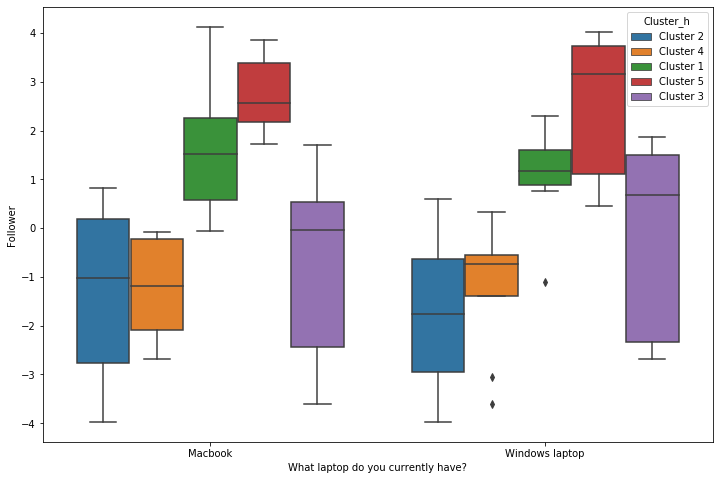

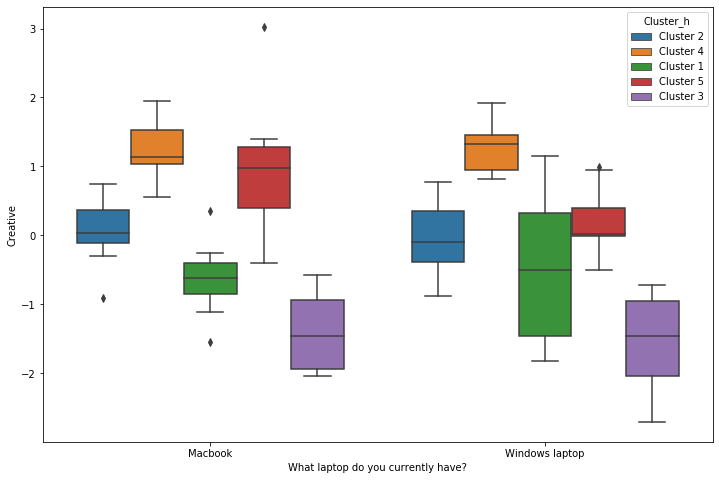

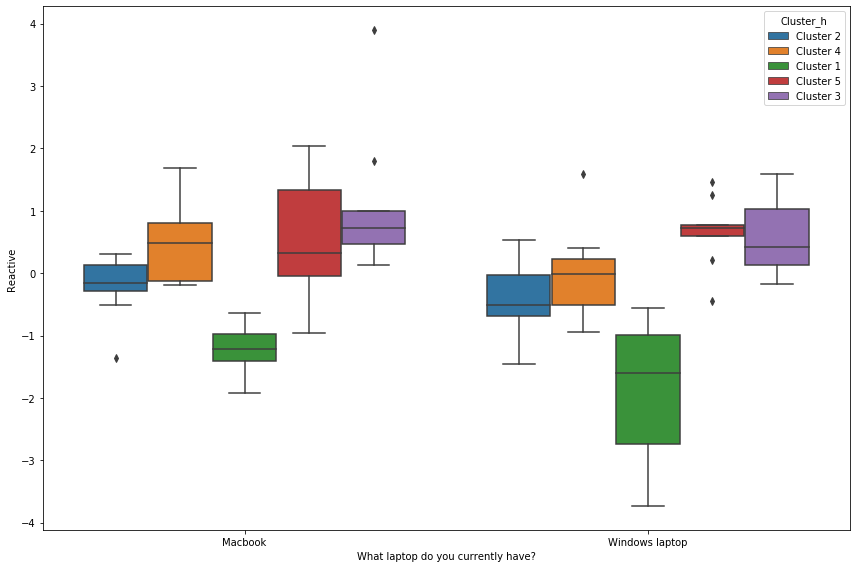

In [80]:
########################
# What laptop do you currently have?
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

**Follower's analysis**
Clusters 2 and 4 have a tendency to not be followers. There is no distinction between Macbook or PC users. 

**Creative's analysis**
Cluster 1 and 3 have a negative correlation to being creative. There is no distinction between Macbook or PC users. 

**Reactive's analysis**
Most clusters are indifferent in regards to their reactiveness without any distinction between Macbook or PC users. Besides cluster 1 who is less reactive.  

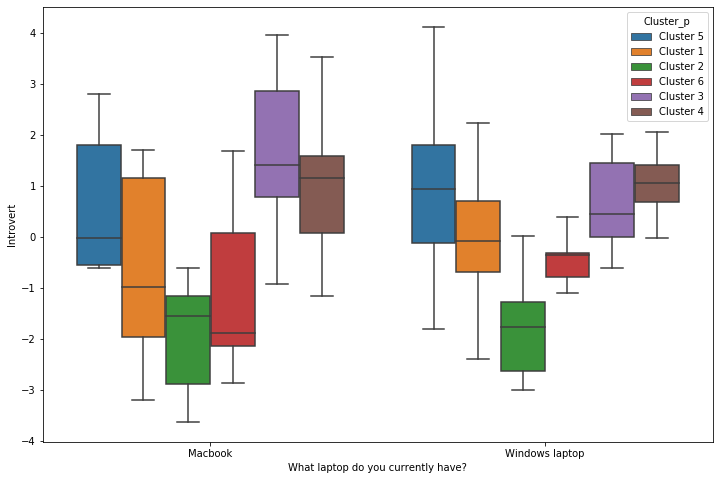

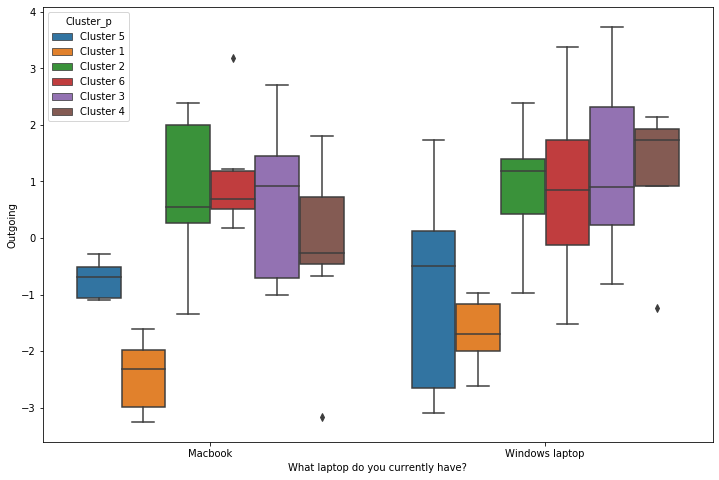

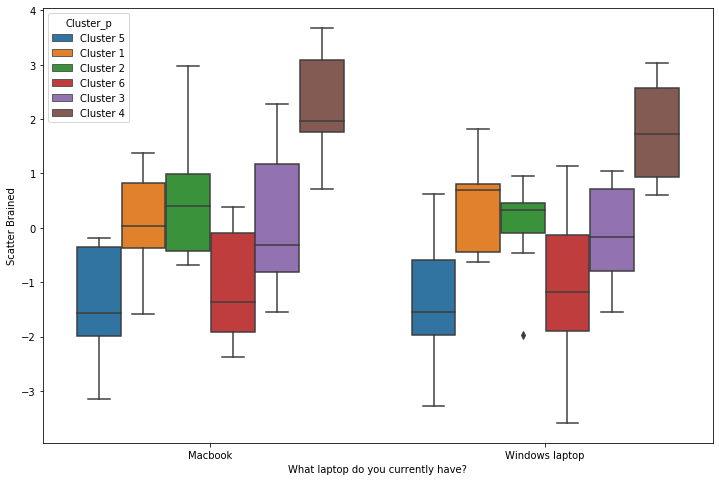

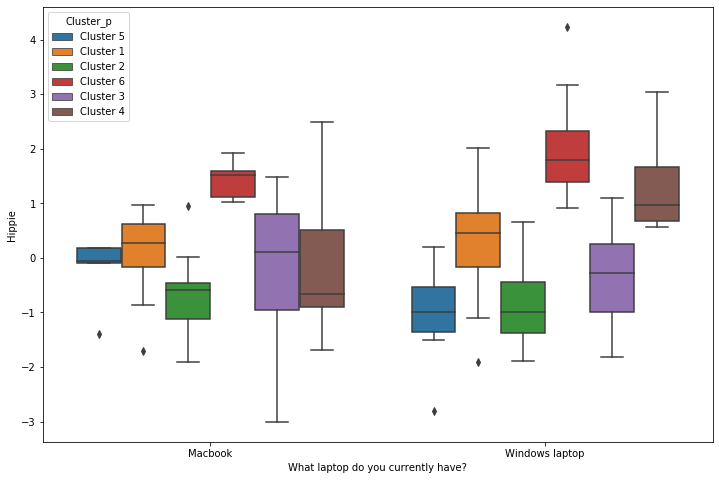

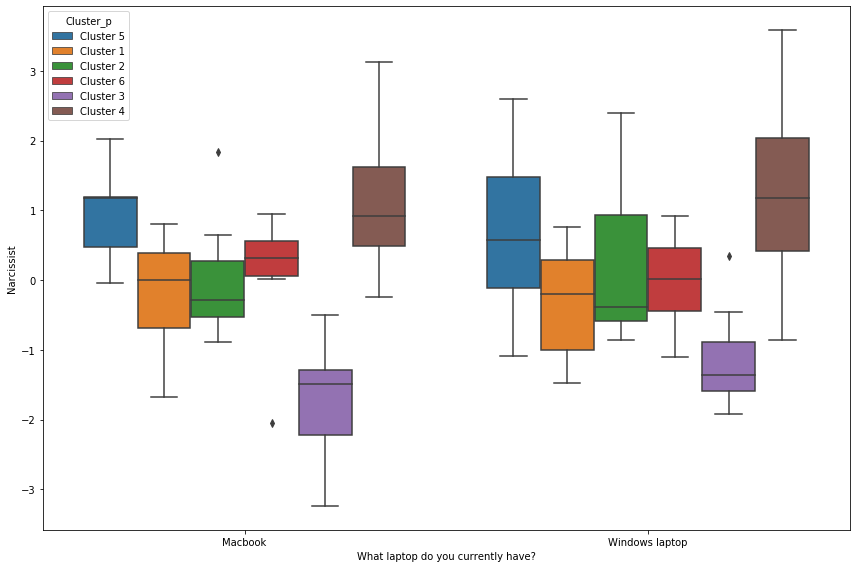

In [81]:
########################
# What laptop do you currently have?
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Outgoing',
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop do you currently have?',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

**Introvert's analysis**
Cluster 6 is more likely to be a Macbook user, with a less introverted personality.

**Outgoing's analysis**
Clusters 2, 3 and 6 are the most aligned with the outgoing personality but no distinction in if they're Macbook or PC users. Windows users in cluster 4 differ from Mac users in that Windows users seem to be more outgoing.  

**Scatter Brained analysis**
Personality don't seem to change depending on if they are a Macbook or a Windows user. 

**Hippie**
Clusters 4 and 5 tend to vary more depending if they're Macbook or Windows users regarding in how well their personality aligns with them. For example for a Macbook user in Cluster 4 the tendency of having "Hippie" characteristics is negative correlated in comparison to a PC user which are positively correlated.

**Narcissists**
Most clusters seem to be aligned with Narcissists characteristics except for cluster 3, which without any distinction in being a Macbook user or PC user, is not aligned with Narcissists characteristics.  

<h3> What laptop would you buy in next assuming if all laptops cost the same?

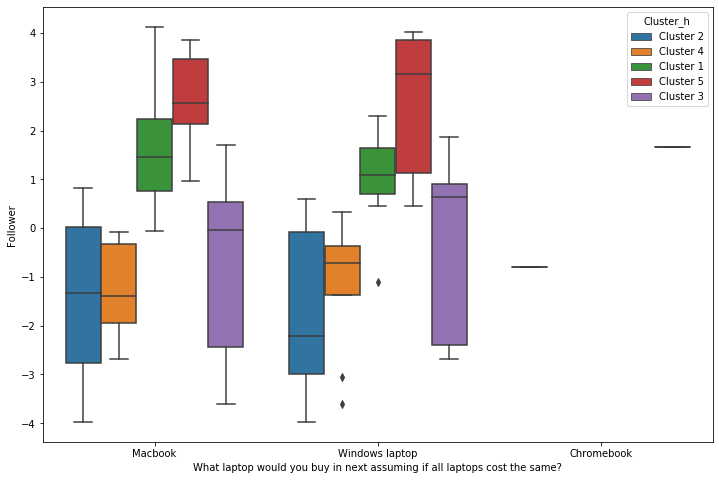

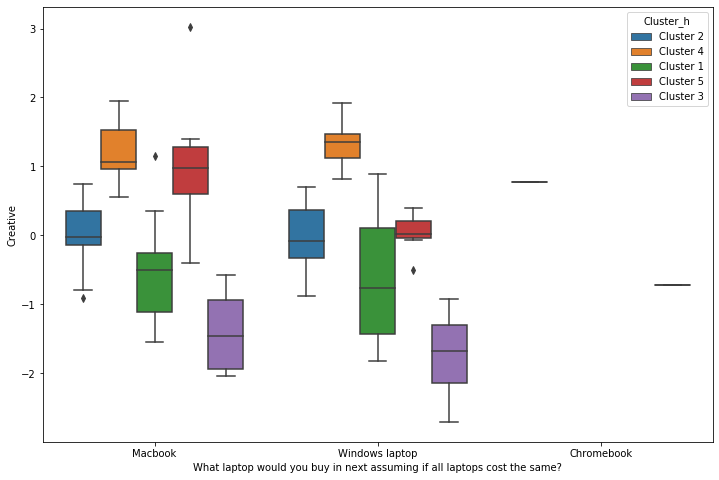

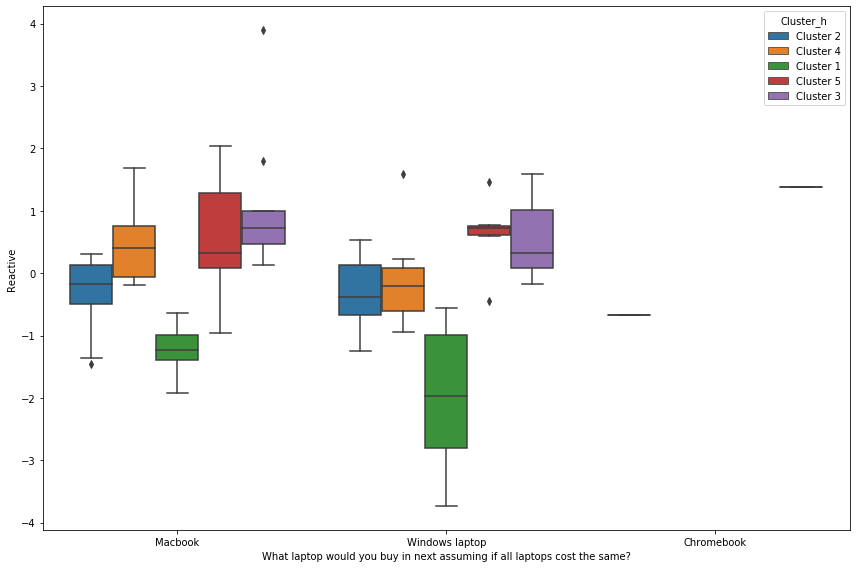

In [82]:
########################
# What laptop would you buy in next assuming if all laptops cost the same?
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

**Follower's analysis**
Clusters 2 and 4 seem to not to be aligned with "Follower's" characteristics in comparison to the rest that are either aligned or positive correlated.

**Creative's analysis**
Clusters 1 and 3 don't seem to share all the "Creative's" characteristics (negatively correlated), while only cluster 5 would change its characteristics according to if it is or is not a Window's or Mac user.  In clusters 4 & 5 we can observe that people are slightly more creative while using Macbooks. 

**Reactive's analysis**
In general reactive personalities tend to be more aligned without any distinction in if they're Window's or Macbook users. The only cluster that does not follow this approach is Cluster 1, which actually shows a negative tendency either in Macbook or Windows users. 

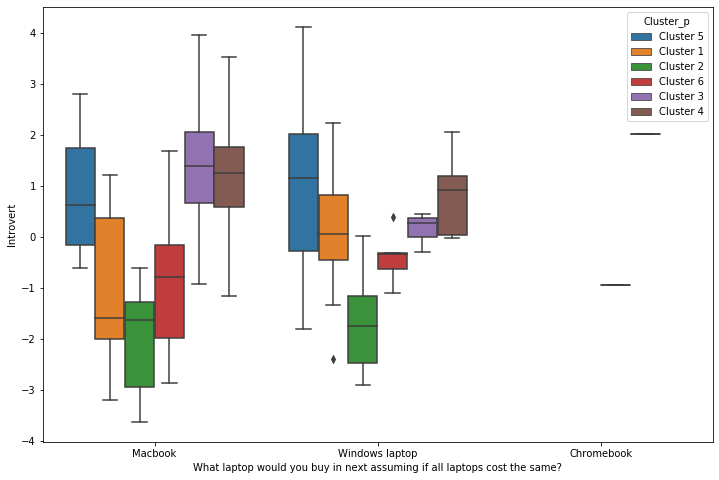

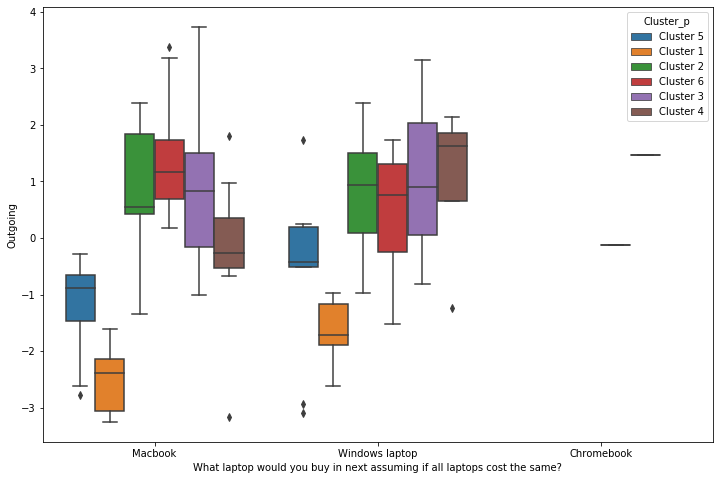

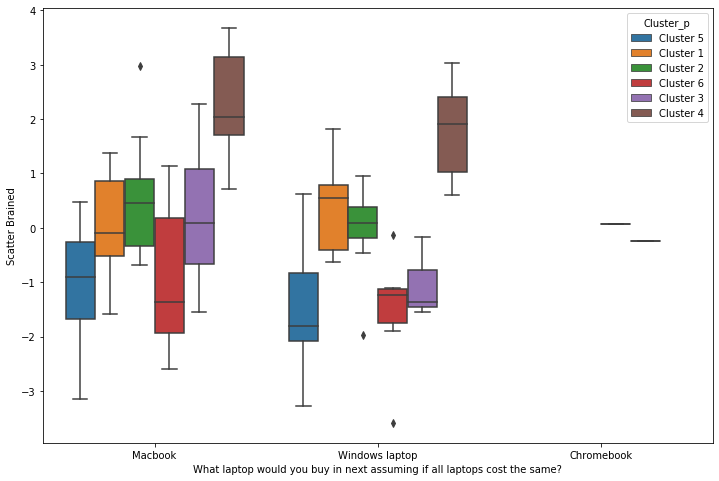

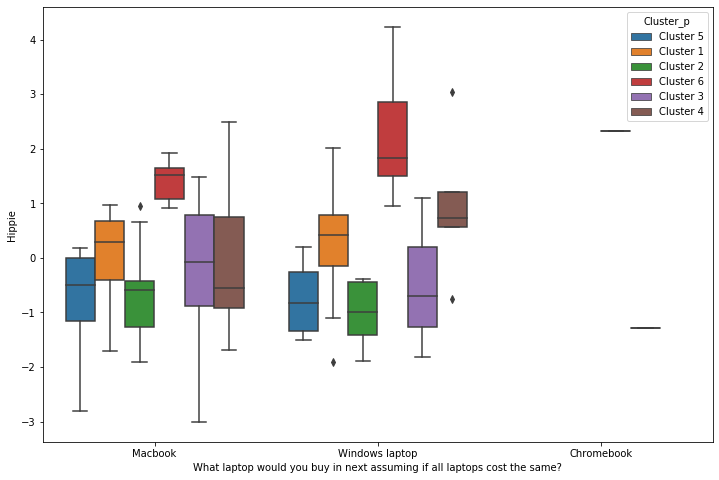

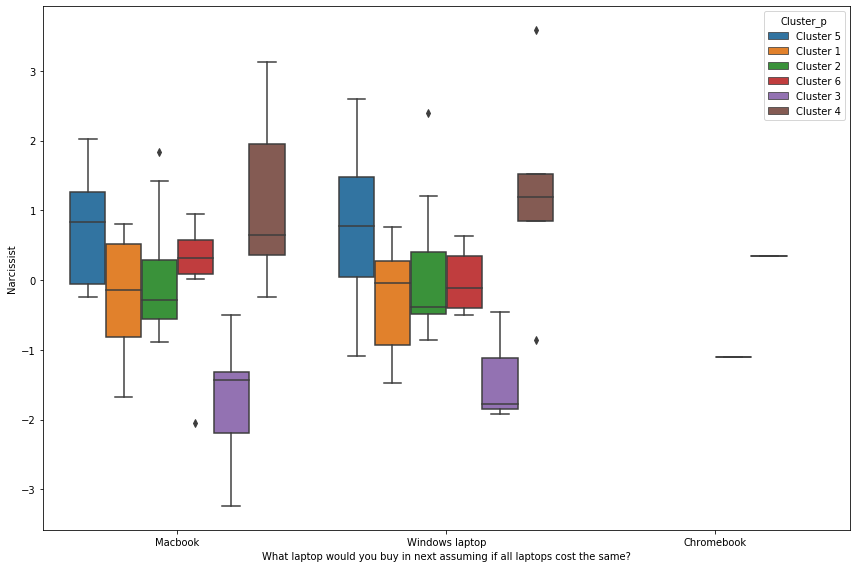

In [83]:
########################
# What laptop would you buy in next assuming if all laptops cost the same?
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Outgoing',
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

**Introvert's analysis**
These clusters seem to vary according to their characteristics whether they are Macbook or Windows users. In general this group would need extra effort to be identified according to their characteristics.   

**Outgoing's analysis** 
Cluster 4 seems to have different characteristics based on if its a Windows or PC user. 
Cluster does not share "Outgoing" characteristics in either of the two segmentations (Windows or PC's user).  

**Scatter Brained analysis**
Scatter Brained profiles are largely Macbook or Window's users.  

**Hippie**
Less of "Hippies" in Cluster 2 and 4 seem to prefer Macbook. 

**Narcissists** 
Most of the clusters are close to the center or have a positive tendency towards the "Narcissist" category, except for the Cluster 3, that does not align with those characteristics. 

<h3> What program are you in?

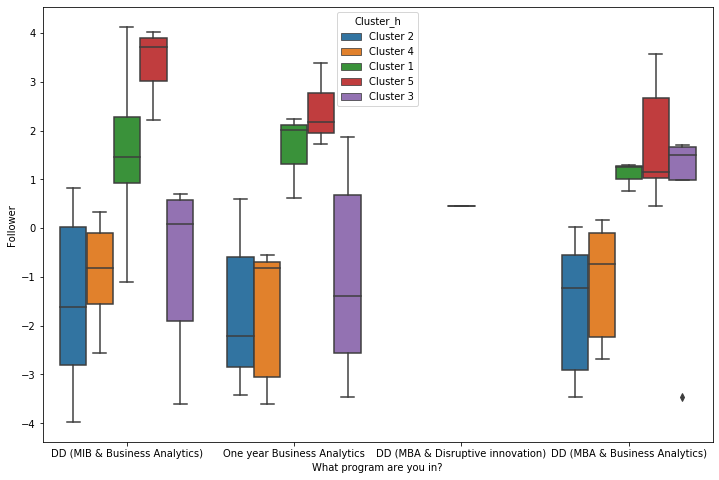

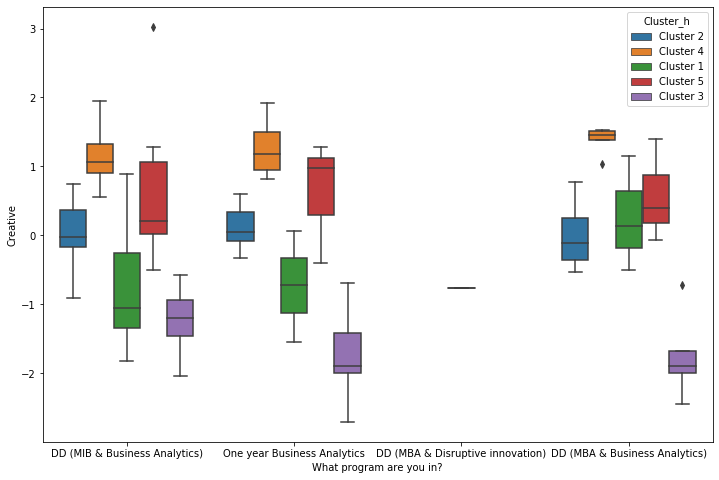

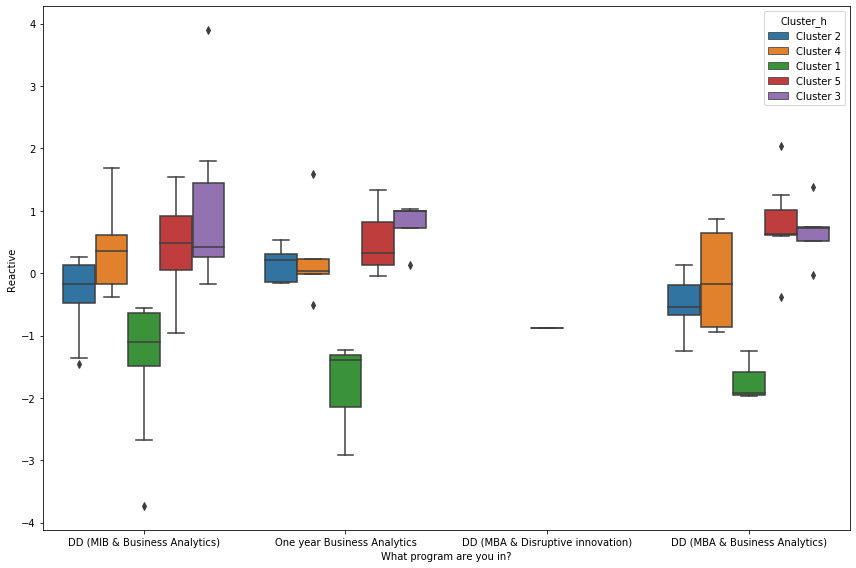

In [84]:
########################
# What program are you in?
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

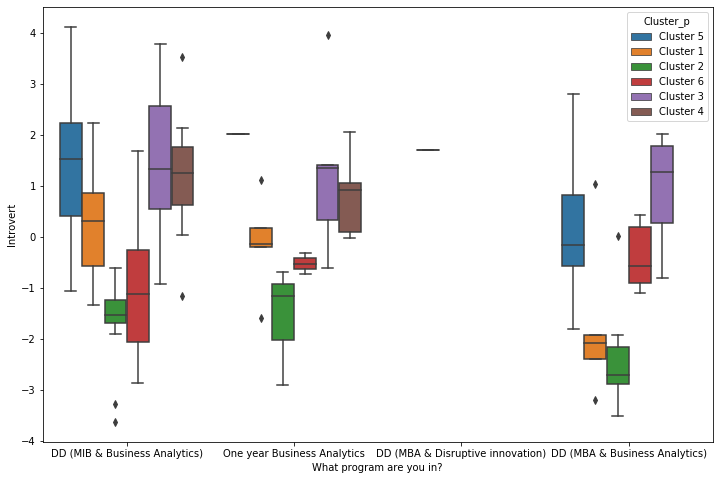

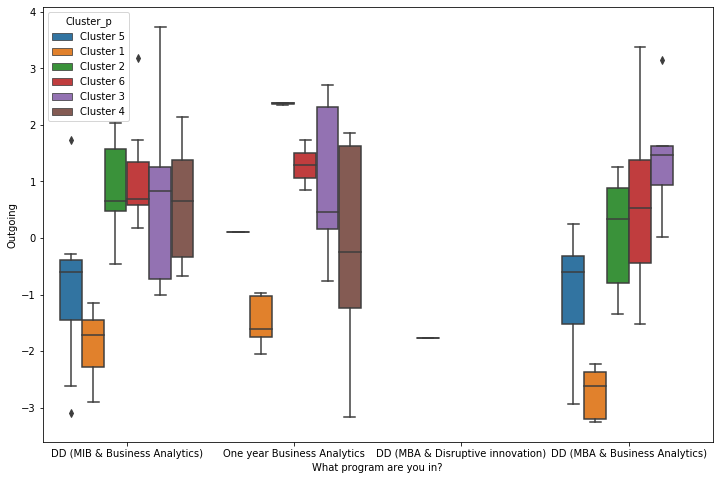

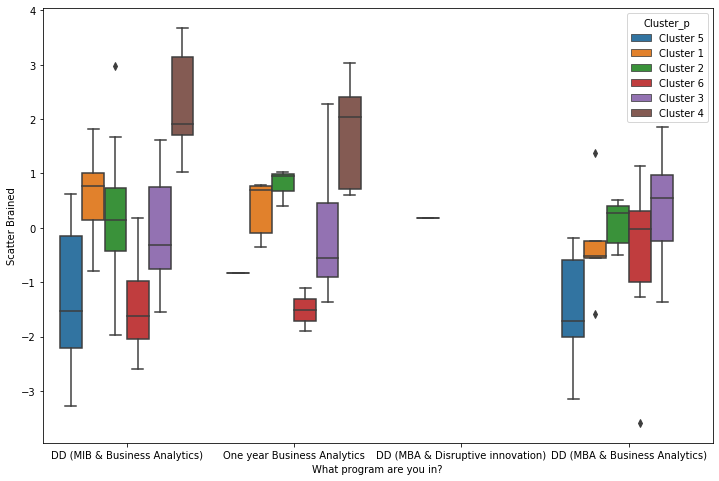

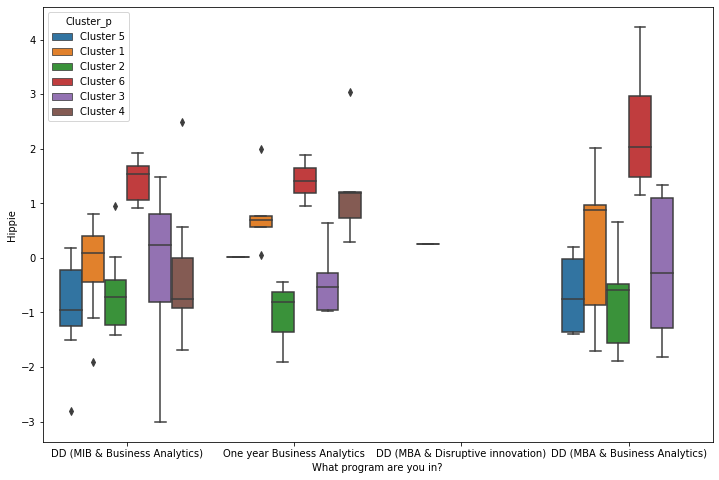

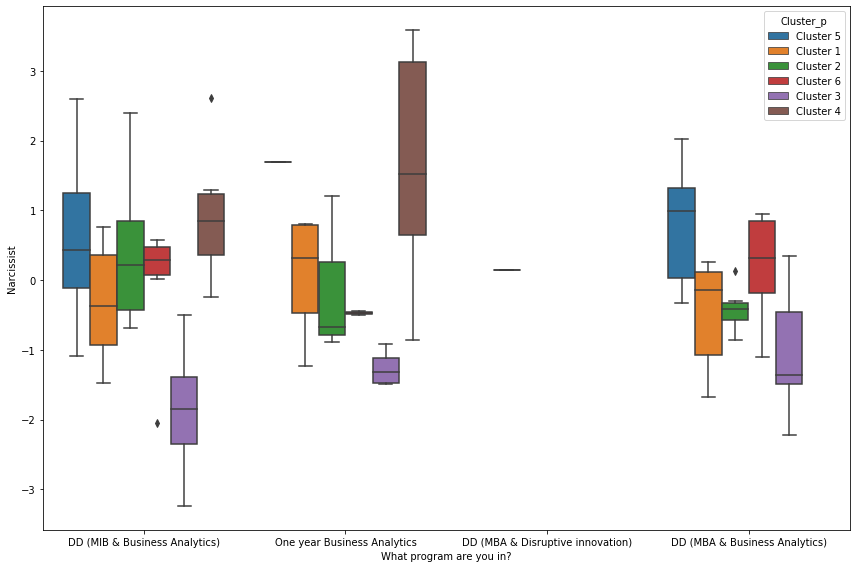

In [85]:
########################
# What program are you in?
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Outgoing',
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What program are you in?',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

**What program are you in?**

They don't let us fairly analyze programs, as they're not evenly categorized. We can observe that as there are three dual degree categories, but only one single year category. If there is variation in categorized dual degree options then there must also be variation in single year options so that you can't properly see clear patterns. It may also be concluded that this survey was done primarily on dual degree students. Business analytics kids do seem to be a bit narcissistic though. ;)

<h3> What is your age?

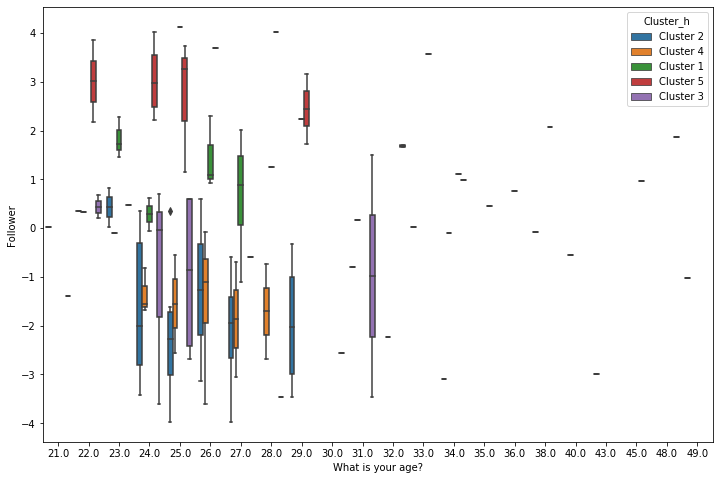

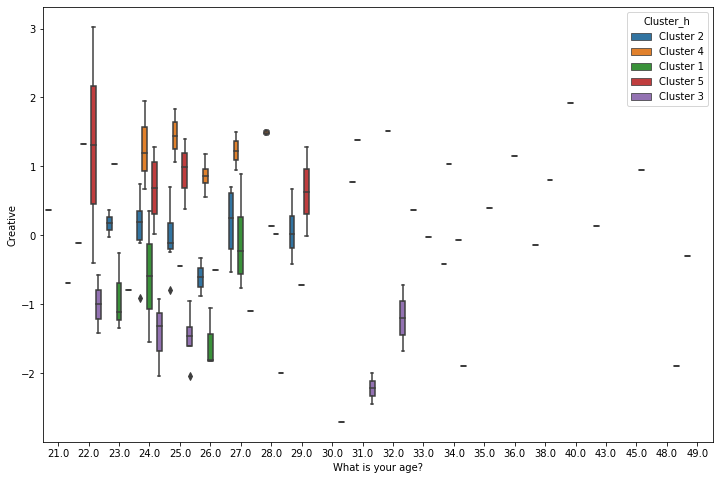

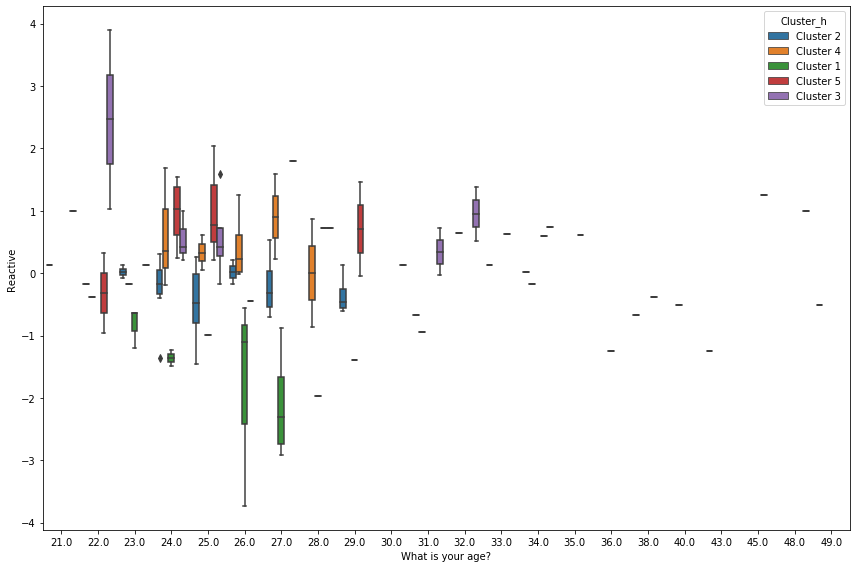

In [86]:
########################
# What is your age?
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

The age gap that we're looking at ,we assume, is college and Master's students.

The only pattern we can observe is for followers and only within clusters 1 & 5, which have a high inclination towards being followers. The rest of the categories don't seem to have a clear clustered pattern. Therefore, we can't say that age is associated with the Hult DNA.

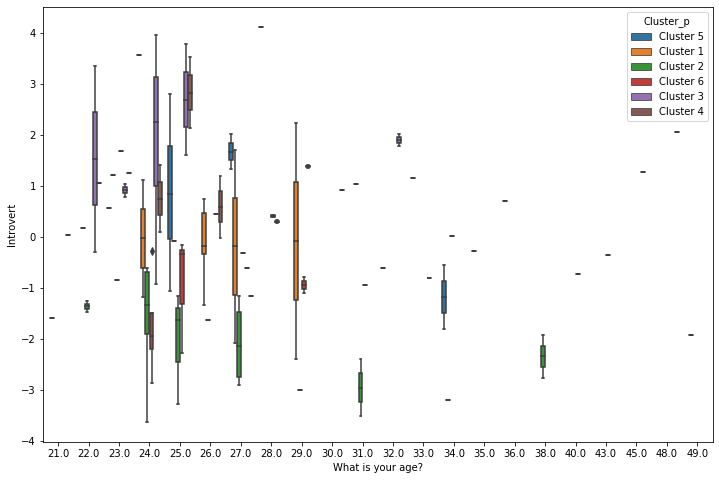

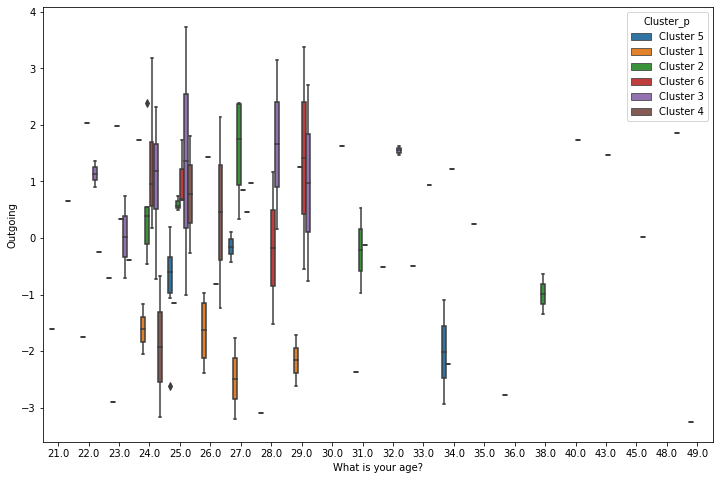

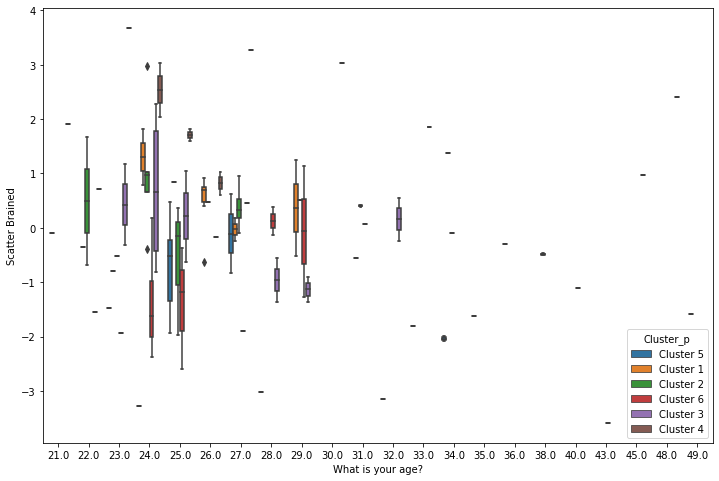

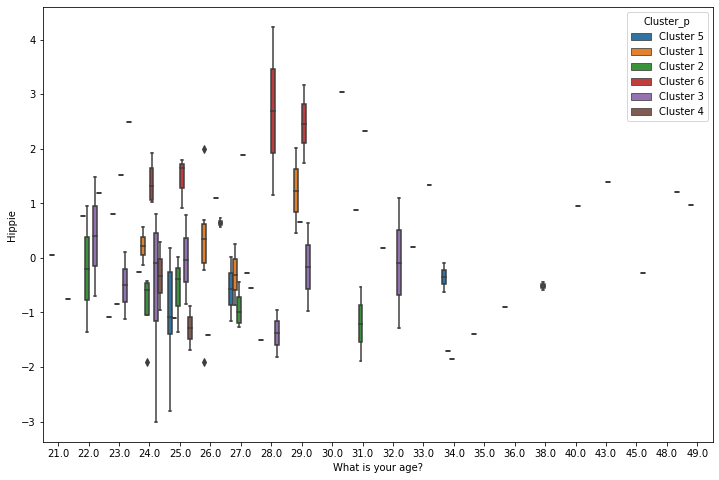

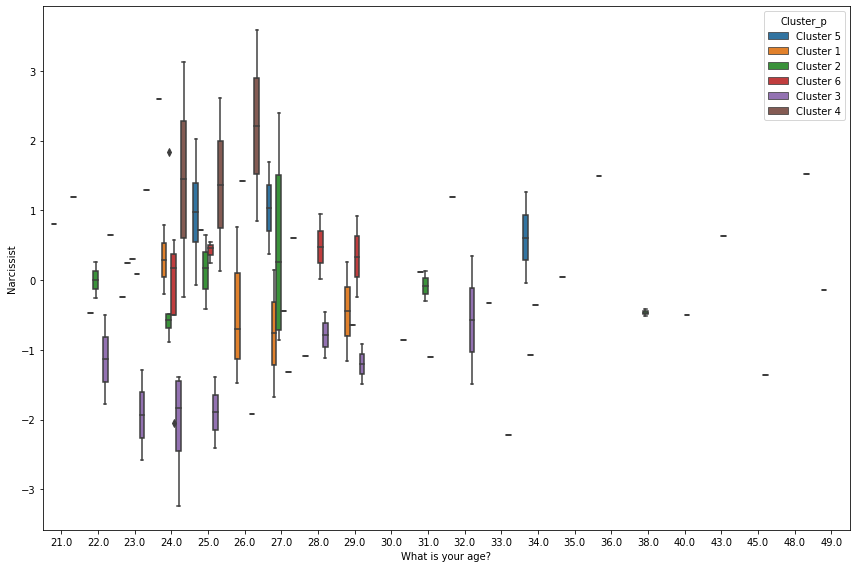

In [87]:
########################
#  What is your age?
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Outgoing',
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your age?',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

From the boxplots displayed, we can say that age is not a determinant factor of someone's personality. For example, we could have a Narcisist personality at the age of 20 or even at the age of 34.

<h3> What is your ethnicity?

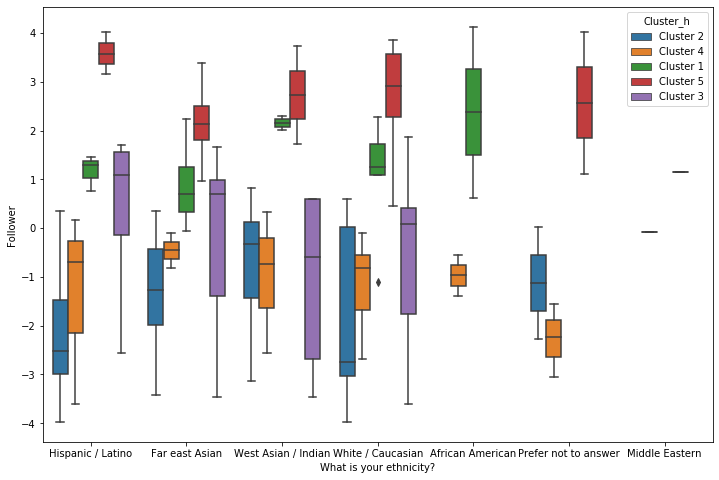

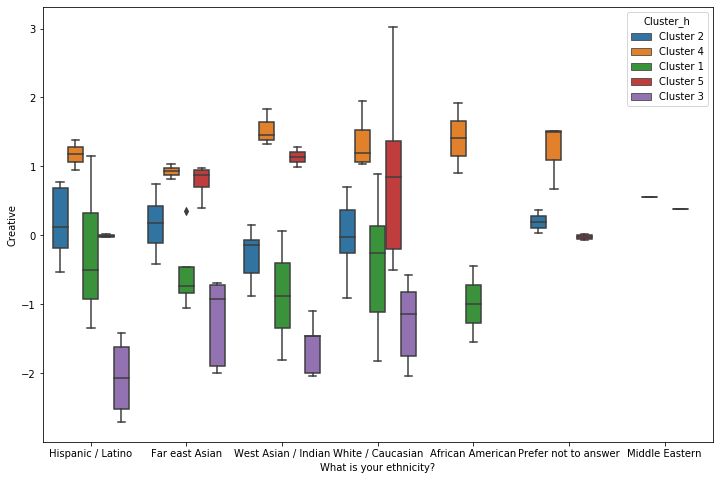

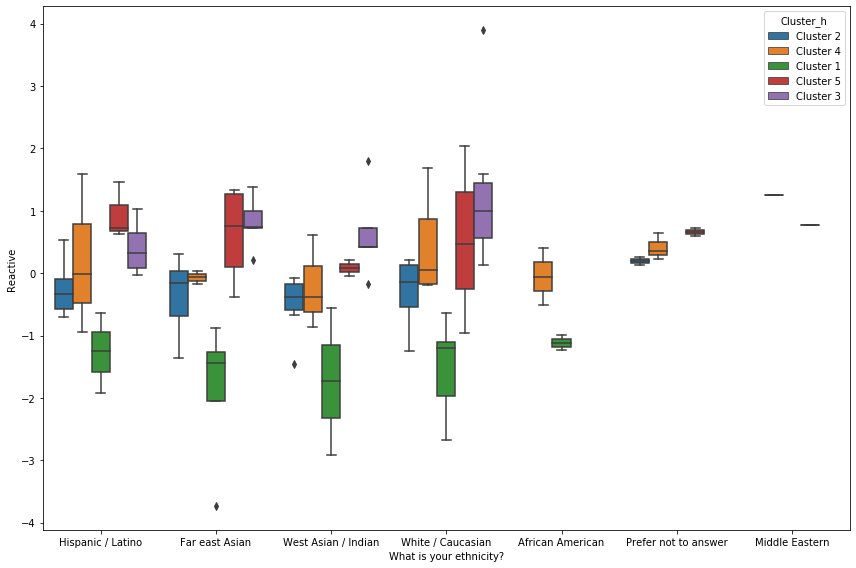

In [88]:
########################
# What is your ethnicity?
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

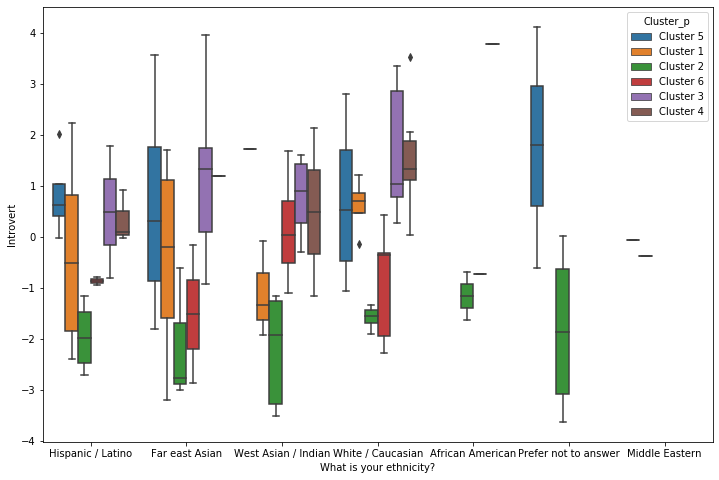

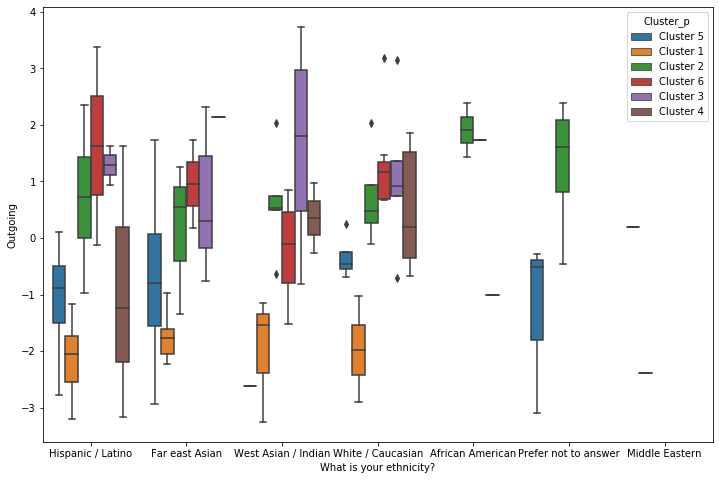

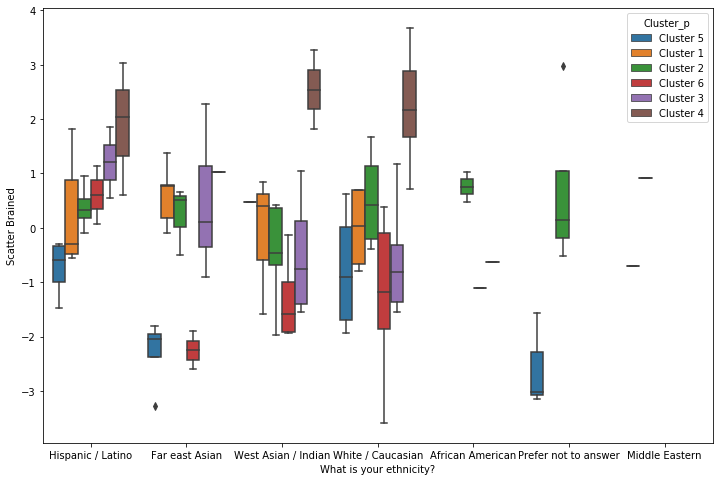

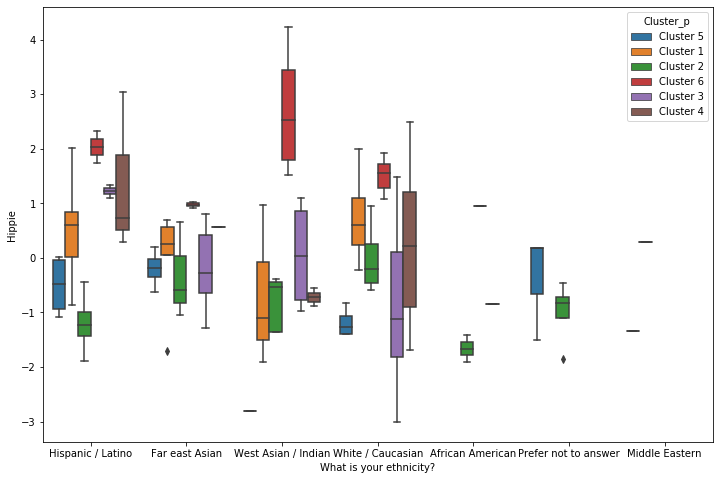

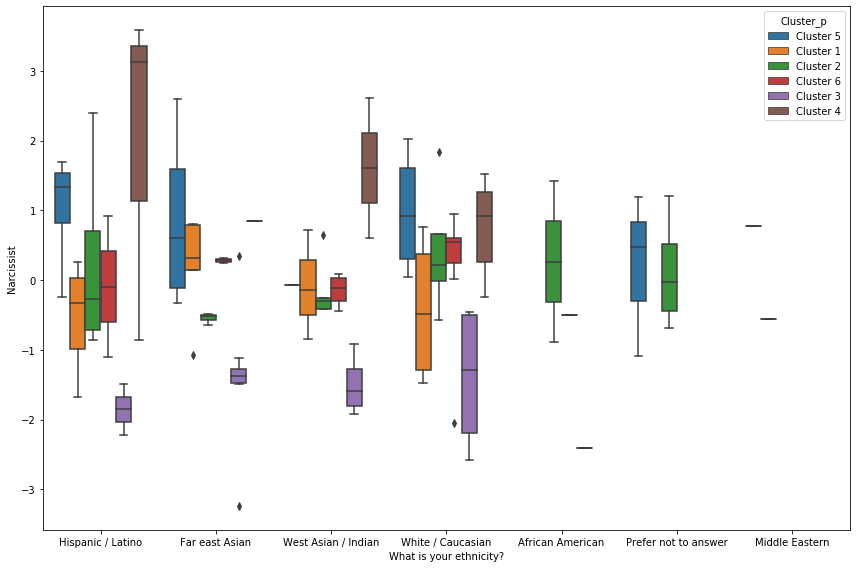

In [89]:
########################
# What is your ethnicity?
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Outgoing',
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your ethnicity?',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

Patterns vary a lot by looking at the ethnicity. It is challenging to get a real perspective of patterns amongst all of the personality traits and ethnicity. There's another important factor that we should take into consideration while analyzing data by this trait, as we don't have equal proportional data in terms of ethnicity and as we are not aware of where this survey took place, therefore ethnicity would vary.

<h3> Gender

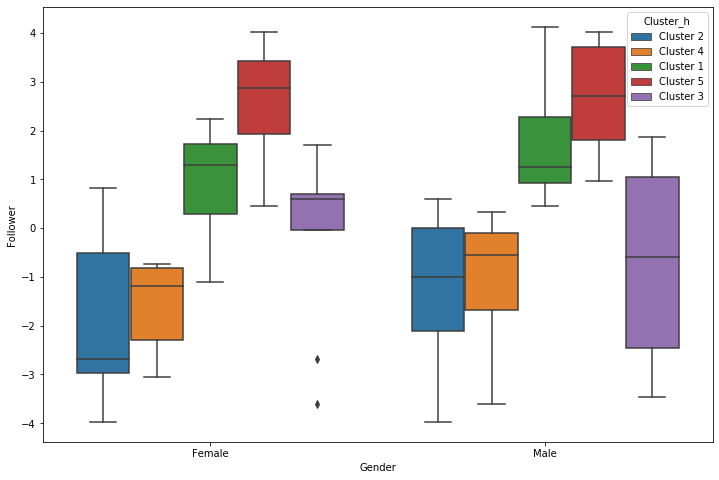

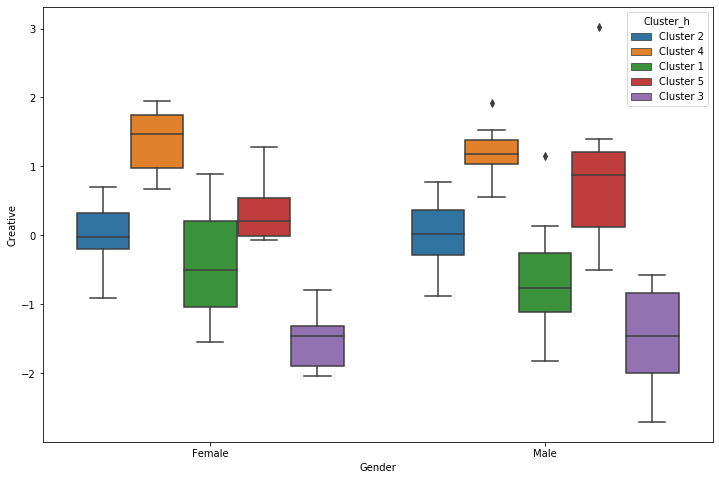

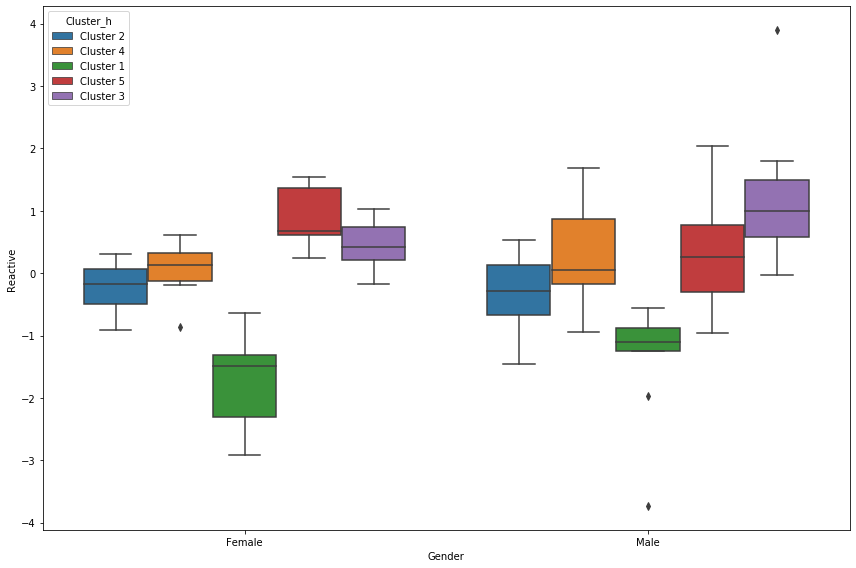

In [90]:
########################
# Gender
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

For gender and the Hult DNA traits, we can conclude that some of the characteristics such as the "Creative" and "Reactive" characteristics are not affected by gender, while the characteristic of "Followers" does vary by gender. For the Hult DNA, it may not be in the best interest to perform an analysis segments by gender. Moreover, making distinctions by gender could lead to misleading information as it could be a sensitive topic and information for the person answering the survey and as people could prefer not to answer this question and therefore this wouldn't be representative of the full sample.

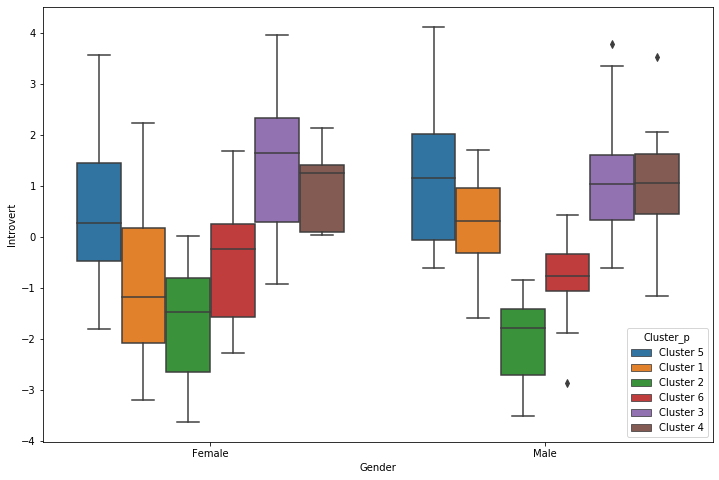

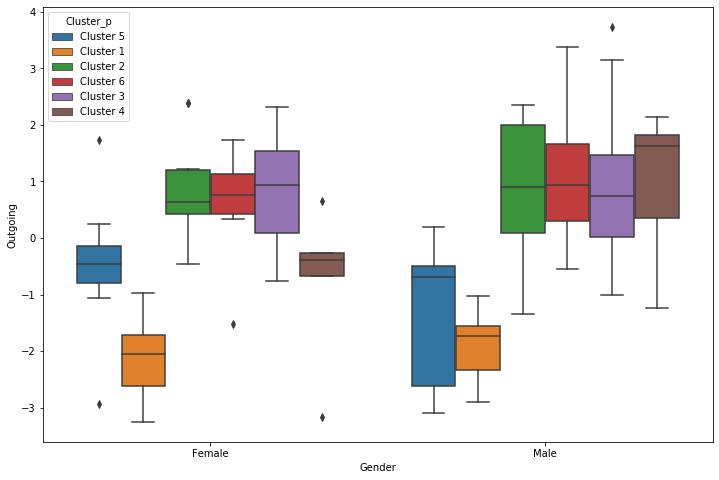

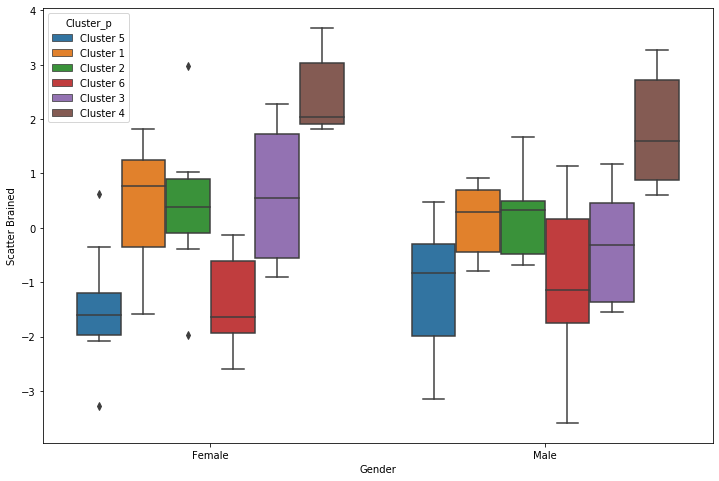

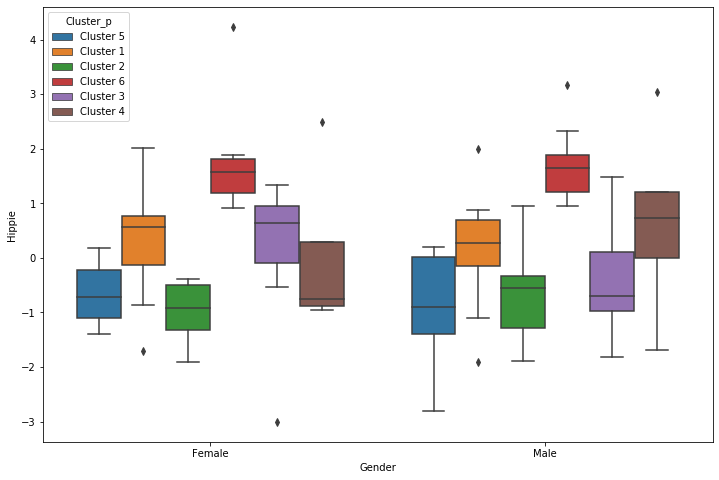

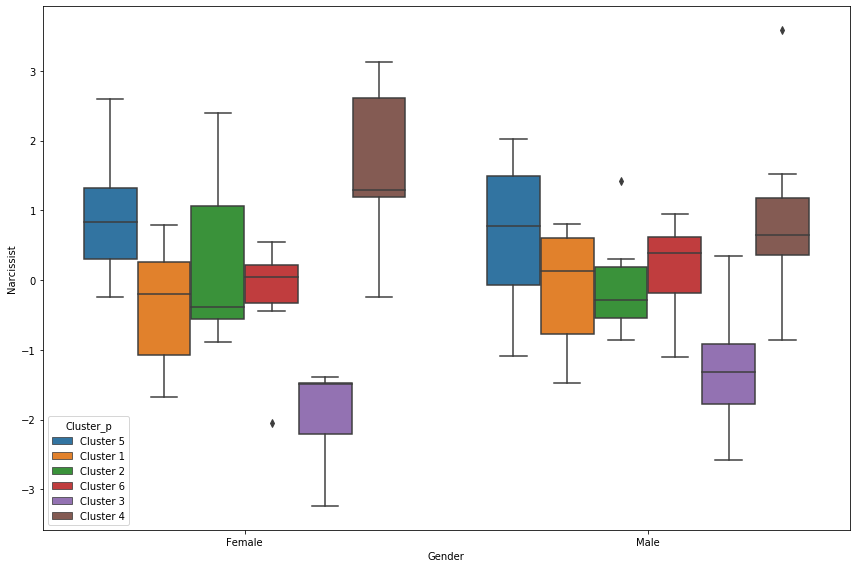

In [91]:
########################
#Gender
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Outgoing',
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Gender',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

The type of personality does seem to be affected by gender as we can observe variation in most of the medians of the boxplots, however, companies must analyze the efforts that further analysis may need.

<h3> What is your nationality?

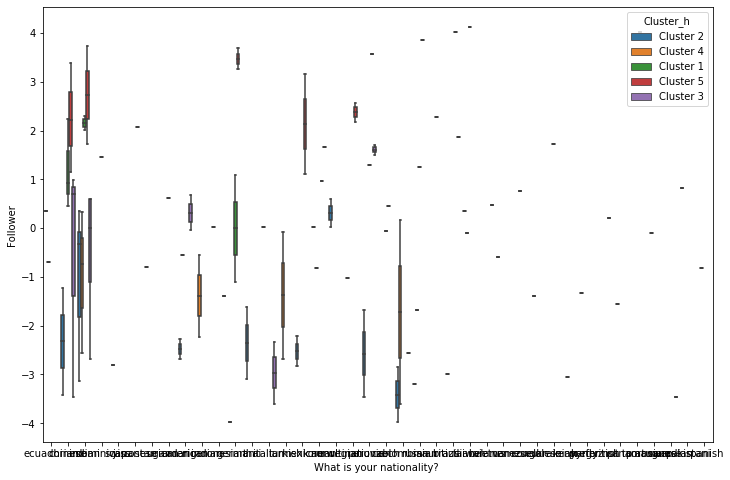

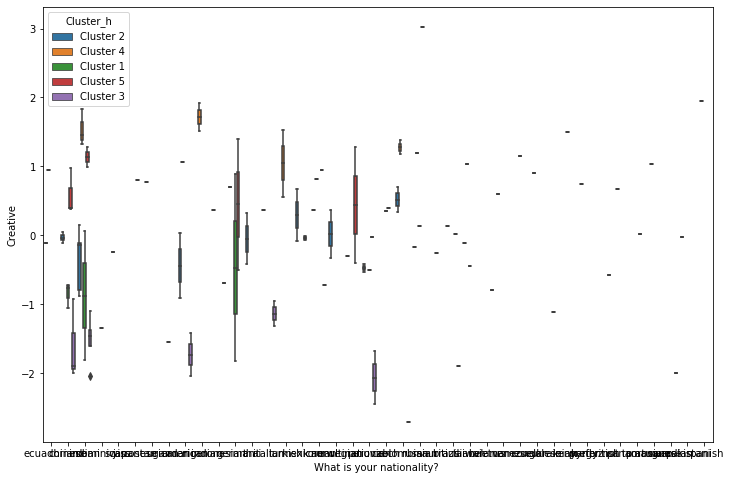

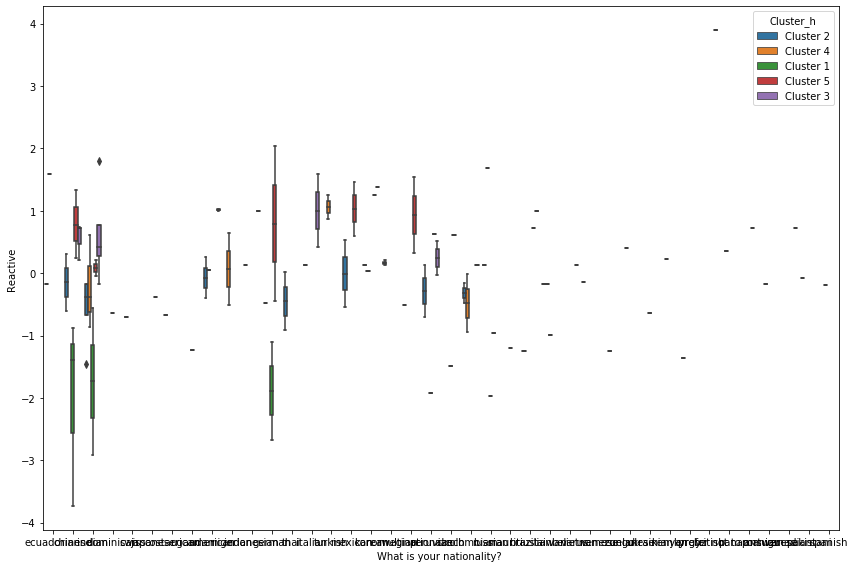

In [92]:
########################
#What is your nationality?
########################
# Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Follower',
            hue  = 'Cluster_h',
            data = data_df)

# Creative
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Creative',
            hue  = 'Cluster_h',
            data = data_df)

# Reactive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Reactive',
            hue  = 'Cluster_h',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

Nationality is not a proper metric to be evaluated in conjunction to the Hult DNA due to its broaden approach.

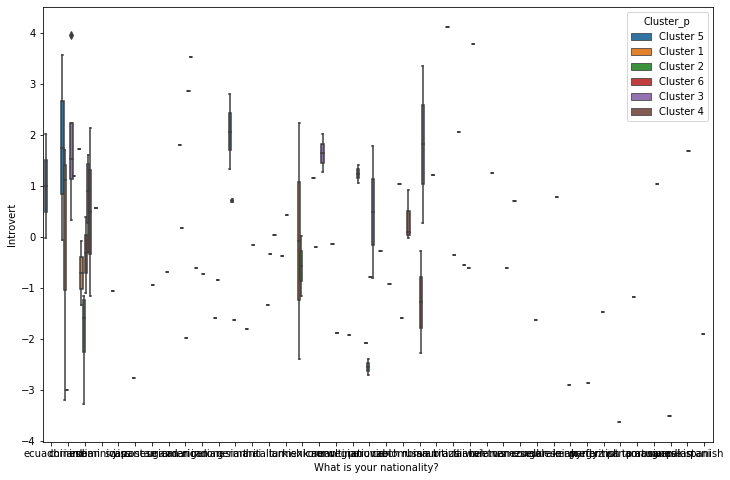

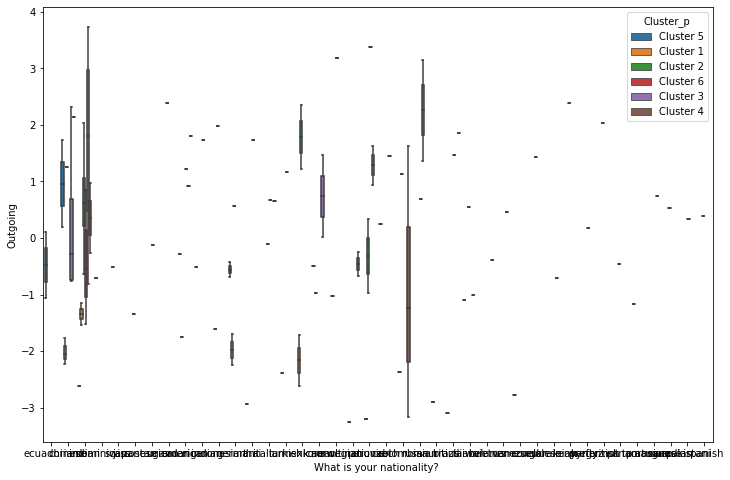

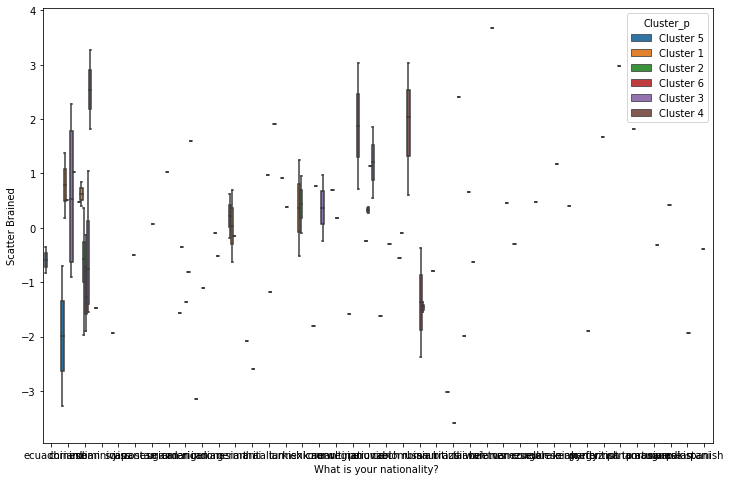

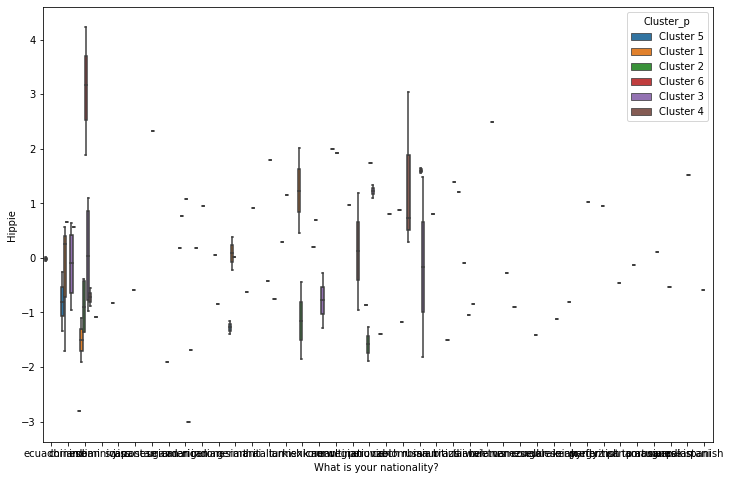

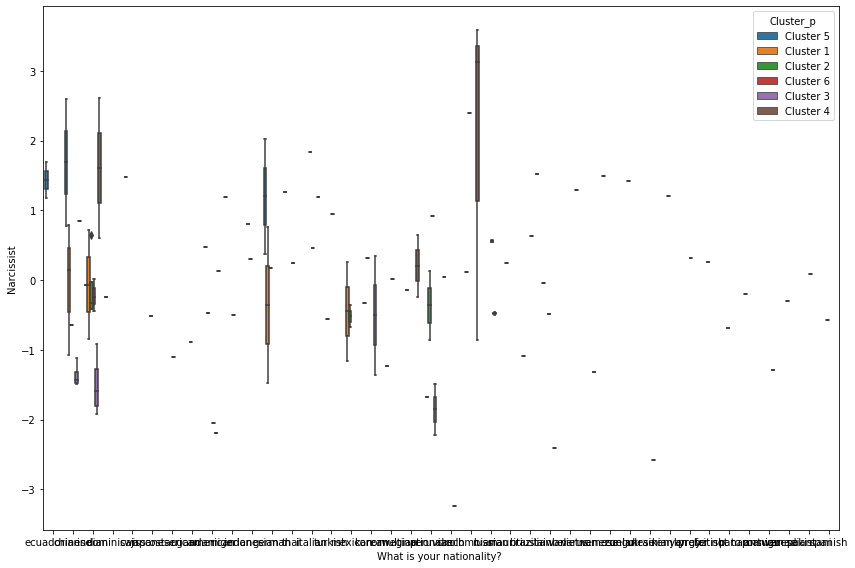

In [93]:
########################
# What laptop do you currently have?
########################
# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Introvert',
            hue  = 'Cluster_p',
            data = data_df)

# Outgoing
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Outgoing', 
            hue  = 'Cluster_p',
            data = data_df)

# Scatter Brained
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Scatter Brained',
            hue  = 'Cluster_p',
            data = data_df)

# Hippie
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Hippie',
            hue  = 'Cluster_p',
            data = data_df)

# Narcissist
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'What is your nationality? ',
            y    = 'Narcissist',
            hue  = 'Cluster_p',
            data = data_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

Nationality is such a specific category that it is challenging to use it as an indicator. In the future it will be useful to create subgroups such as region in order to have a better understanding of customer type. 
There is a distinct audience seen in personality and Hult DNA as we look at nationalities especially on the left side of the graph, but specific patterns would come from subgroups.  


<h2> Conclusions

Through our findings, we inferred  that the group of people being surveyed were potential college and masters students. Some bias may have occurred from the categorical variables as age group, program, and nationality either did not have enough variation, or there was too much to fairly analyze it (i.e. not many people above 40 were in this survey).

Externally, a large amount of college students usually have Macbooks due to their user friendly characteristics and overall popularity seen in Apple products. This was proven in the dataset as in if there was any variation at all, it usually pointed towards Macbook. For example, we found that creative people tend to prefer them.

Through our findings, we inferred that the group of people being surveyed were potential college and masters students. Some bias may have occurred from the categorical variables as age group, program, and nationality either did not have enough variation, or there was too much to fairly analyze it (i.e. not many people above 40 were in this survey).

Externally, a large amount of college students usually have Macbooks due to their user friendly characteristics and overall popularity seen in Apple products. This was proven in the dataset as in if there was any variation at all, it usually pointed towards Macbook. For example, we found that creative and narcissitic people tend to prefer them.  Also in our findings  from our personality data, creative people seen in the Hult DNA  were most responsive. 

As most of the data falls in favor of Apple, there is still room for more improvement. An example of this was seen when if someone already owned a macbook and was part of the survey, there is a high likelihood they would buy another. Apple may want to survey people who donâ€™t own a macbook. In assuming they conducted this survey to look at students, there should be more categories in programs to generate balance and fairness.